#### Import libraries and data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

import ydata_profiling as pandas_profiling

pd.set_option('display.max_columns', 1000)

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.shape, df_test.shape

((134189, 4), (3998, 4))

In [3]:
df_train.head()

call_start_time                                           callerid  \
0  2021-01-18 16:11:24  618659a65b12db68ad774c0e503b691cf1520d20296914...   
1  2020-10-02 18:08:23  618659a65b12db68ad774c0e503b691cf1520d20296914...   
2  2020-10-24 14:19:55  618659a65b12db68ad774c0e503b691cf1520d20296914...   
3  2020-10-08 14:40:28  618659a65b12db68ad774c0e503b691cf1520d20296914...   
4  2021-07-16 16:58:52  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                          called_num disposition  
0  b7db10be121989dad39ac5a680ae7bdbd4d62f0b050017...      ANSWER  
1  1e4dcaf51462a6482d21640400770ad1d2e4833c44f97c...   No Answer  
2  d6dabd744a44b353ff9099bd684da777df7370c3165fe0...      ANSWER  
3  eab26534687927af54c4be6c2d54b2426cab22de11adc9...   No Answer  
4  e033150a2b2dff7f0be7231358b881c972df04c776a554...   No Answer

In [4]:
df_test.head()

call_start_time                                           callerid  \
0  2021-11-28 13:15:52  618659a65b12db68ad774c0e503b691cf1520d20296914...   
1  2021-05-06 16:23:39  618659a65b12db68ad774c0e503b691cf1520d20296914...   
2  2021-07-28 15:41:02  618659a65b12db68ad774c0e503b691cf1520d20296914...   
3  2021-03-03 16:03:58  618659a65b12db68ad774c0e503b691cf1520d20296914...   
4  2021-01-22 13:12:42  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                          called_num disposition  
0  5eb85e040c31d9b1d68da5cf749055008018f38fedce87...      ANSWER  
1  7d1a6c9598c5d73c131edda47957ec9c0c1a58094938b5...      ANSWER  
2  d5f30470fe78332b79a218809b4e5eadac04345e313d74...   No Answer  
3  91c36f74d9ff7e1f6c9bc3536ac3a7feeed8348227007b...   No Answer  
4  23baba5114a20eeec8acb337d6e2d108092ccf0729cc4f...      ANSWER

#### Basic Data Analysis

In [5]:
profile_tr = df_train.profile_report(title='Pandas Profiling Report')
profile_tr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_train.describe()

call_start_time  \
count                134189   
unique               123422   
top     2019-02-12 16:14:54   
freq                     15   

                                                 callerid  \
count                                              134189   
unique                                                  3   
top     618659a65b12db68ad774c0e503b691cf1520d20296914...   
freq                                               128222   

                                               called_num disposition  
count                                              134189      114190  
unique                                             126212           2  
top     da35bd45709391715dfdac5c2f1b2a4d862a0b4ccc892b...      ANSWER  
freq                                                    6       61618

In [7]:
df_train.isnull().sum()

call_start_time        0
callerid               0
called_num             0
disposition        19999
dtype: int64

In [8]:
df_train.isnull().sum()/len(df_train)

call_start_time    0.000000
callerid           0.000000
called_num         0.000000
disposition        0.149036
dtype: float64

In [9]:
df_nan = df_train[df_train.isnull().any(axis=1)]
df_nan.head()

call_start_time                                           callerid  \
8   2021-06-10 16:09:31  618659a65b12db68ad774c0e503b691cf1520d20296914...   
10  2021-07-04 12:57:43  618659a65b12db68ad774c0e503b691cf1520d20296914...   
13  2021-05-28 11:17:03  618659a65b12db68ad774c0e503b691cf1520d20296914...   
15  2020-11-10 09:42:18  618659a65b12db68ad774c0e503b691cf1520d20296914...   
20  2021-03-05 14:52:43  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                           called_num disposition  
8   a202cfe7af4e973474509a1cd8e585fc7cd0670ed1681e...         NaN  
10  a78d5feab7f64bae20403df50fd748542e7fc457498d7f...         NaN  
13  9a93dea7b38787b28172217caa443b7103355f048c7e8b...         NaN  
15  bb410c3f354c1a2d00290c6dfdc8cd15ec4a6aeb1c3de6...         NaN  
20  0f7dd8d867ff03311f4fe30de3b5ea40474769ab1208e3...         NaN

In [10]:
profile_tr_nan = df_nan.profile_report(title='Pandas Profiling Report')
profile_tr_nan

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df_tr = df_train.copy()
df_ts = df_test.copy()

df_tr.shape, df_ts.shape

((134189, 4), (3998, 4))

In [12]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134189 entries, 0 to 134188
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   call_start_time  134189 non-null  object
 1   callerid         134189 non-null  object
 2   called_num       134189 non-null  object
 3   disposition      114190 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB


In [13]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   call_start_time  3998 non-null   object
 1   callerid         3998 non-null   object
 2   called_num       3998 non-null   object
 3   disposition      3998 non-null   object
dtypes: object(4)
memory usage: 125.1+ KB


In [14]:
# control if unique values have special meaning

len(df_tr["called_num"][0]), len(df_tr["called_num"][len(df_tr)-1]), len(df_ts["called_num"][0]), len(df_ts["called_num"][len(df_ts)-1])
# for i in range(df_tr.shape[0]):
#     if len(df_tr["called_num"][i]) != 64:
#         print("nok")
#         
# for i in range(df_ts.shape[0]):
#     if len(df_ts["called_num"][i]) != 64:
#         print("nok")

(64, 64, 64, 64)

In [15]:
# df_tr[["disposition"]] = df_tr[["disposition"]].replace([np.inf, -np.inf, 'None'], np.nan)
# df_tr = df_tr[~df_tr.isnull().any(axis=1)]

In [16]:
tr_dispstns = df_tr["disposition"].value_counts().to_dict()
ts_dispstns = df_ts["disposition"].value_counts().to_dict()

tr_dispstns, ts_dispstns

({'ANSWER': 61618, 'No Answer': 52572}, {'ANSWER': 1999, 'No Answer': 1999})

Text(0.5, 1.0, 'train')

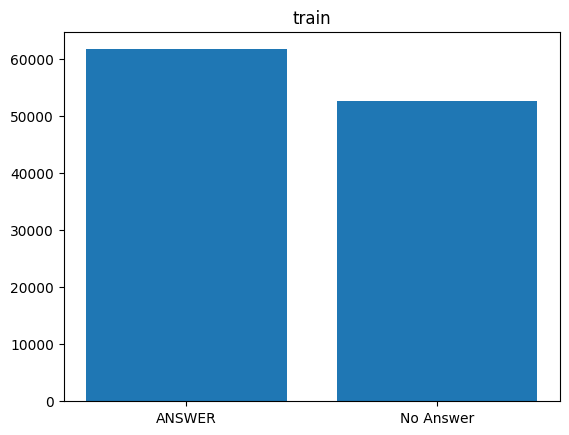

In [17]:
keys = [str(val) for val in list(tr_dispstns.keys())]
vals = list(tr_dispstns.values())

plt.bar(keys, vals)
plt.title("train")

Text(0.5, 1.0, 'test')

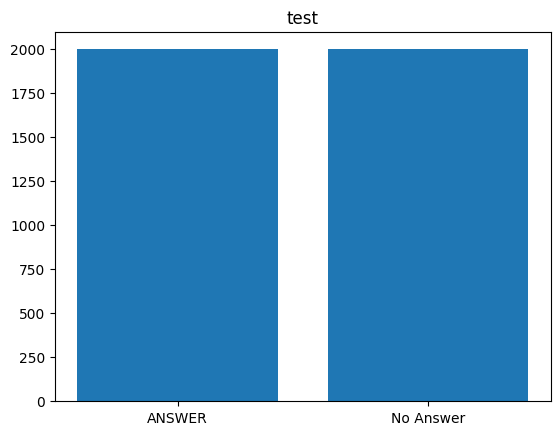

In [18]:
keys = [str(val) for val in list(ts_dispstns.keys())]
vals = list(ts_dispstns.values())

plt.bar(keys, vals)
plt.title("test")

In [19]:
(61618 - 52572)/52572

0.17206878186106672

* Sınıf dağılımında test verisi tamamen dengeliyken, eğitim verilerin bu dağılım biraz 'Answer' cevabının daha fazla olduğunu görmekteyiz((%17 civarı fark olduğu görülür)

In [20]:
# control total count of called_num that in both test and train
len(set(df_ts["called_num"]).intersection(df_tr["called_num"]))

489

* Test verisi ile eğitim verisindeki aranan numaralara bakıldığında oransal olarak çok küçük miktarının aynı olduğu görülmekte
* Eğitilmeyen aynı aranan numaralara farklı bir id verilerek bu farklılığı belirginleştirmek faydalı olabilir. Örneğin eğitim versinde yer alıp da test verisinde yer almayan called_num değerlerine yeni bir id atamak gibi. Aynı durum test verisi için de geçerli ve buna da yeni bir id atamak faydalı olabilir..

In [21]:
# get nan rows that has no disposition
df_nan = df_tr[df_tr.isnull().any(axis=1)]
df_nan.shape

(19999, 4)

* Eğitim etiket verisinde bazı değerlerde veri olmadığı görülüyor (19999). Bu sütunları hepsini veriden çıkarmak yerine test verisindeki aranan numaralar listesinde olmayan kayıtları düşürmek ve bu nan değerleri belirli bir mantık ile doldurmak daha faydalı olabilir. Öncelikle eğiitm verisinde aranan listesinde olup test verisinde de olan kayıtlar dışındaki değerleri veriden düşürelim

In [22]:
# control total count of called_num of test that in train nan rows
len(set(df_ts["called_num"]).intersection(df_nan["called_num"]))

67

In [23]:
# get nan rows that called_num not in test to remove them in train
df_nan = df_nan.loc[~(df_nan["called_num"].isin(set(df_ts["called_num"])))]
df_nan.shape

(19931, 4)

In [24]:
df_nan.head()

call_start_time                                           callerid  \
8   2021-06-10 16:09:31  618659a65b12db68ad774c0e503b691cf1520d20296914...   
10  2021-07-04 12:57:43  618659a65b12db68ad774c0e503b691cf1520d20296914...   
13  2021-05-28 11:17:03  618659a65b12db68ad774c0e503b691cf1520d20296914...   
15  2020-11-10 09:42:18  618659a65b12db68ad774c0e503b691cf1520d20296914...   
20  2021-03-05 14:52:43  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                           called_num disposition  
8   a202cfe7af4e973474509a1cd8e585fc7cd0670ed1681e...         NaN  
10  a78d5feab7f64bae20403df50fd748542e7fc457498d7f...         NaN  
13  9a93dea7b38787b28172217caa443b7103355f048c7e8b...         NaN  
15  bb410c3f354c1a2d00290c6dfdc8cd15ec4a6aeb1c3de6...         NaN  
20  0f7dd8d867ff03311f4fe30de3b5ea40474769ab1208e3...         NaN

In [25]:
# remove rows that called_num not in test data
df_tr = df_tr.loc[~df_tr.index.isin(df_nan.index.tolist()), :]
df_tr.shape

(114258, 4)

In [26]:
df_tr.head()

call_start_time                                           callerid  \
0  2021-01-18 16:11:24  618659a65b12db68ad774c0e503b691cf1520d20296914...   
1  2020-10-02 18:08:23  618659a65b12db68ad774c0e503b691cf1520d20296914...   
2  2020-10-24 14:19:55  618659a65b12db68ad774c0e503b691cf1520d20296914...   
3  2020-10-08 14:40:28  618659a65b12db68ad774c0e503b691cf1520d20296914...   
4  2021-07-16 16:58:52  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                          called_num disposition  
0  b7db10be121989dad39ac5a680ae7bdbd4d62f0b050017...      ANSWER  
1  1e4dcaf51462a6482d21640400770ad1d2e4833c44f97c...   No Answer  
2  d6dabd744a44b353ff9099bd684da777df7370c3165fe0...      ANSWER  
3  eab26534687927af54c4be6c2d54b2426cab22de11adc9...   No Answer  
4  e033150a2b2dff7f0be7231358b881c972df04c776a554...   No Answer

* Şimdi de bu nan olan etiket kayıtlarını daha önce aranan listesinde varsa bu verilerin etiket bilgisini kullanarak dolduralım
* Eğitim verisinde aranan listesindeki olan etiket bilgisinin aynısını bu kayıtlara atayalım- şayet aynı etiket bilgilerine sahiplerse (hep cevap vermiş ya da vermemişlerse)
* Bu kayıtlrı veriden çıkartadabiliriz. Ama aranan numaralar daha önce cevap vermişse ya da vermemişse burdaki tarih ve callerid bilgileri test verisi üzerinde olumlu etki bırakması yüksek

In [27]:
# get df nan raws that has no disposition
df_nan = df_tr[df_tr.isnull().any(axis=1)]
df_not_nan = df_tr[~df_tr.isnull().any(axis=1)]

df_tr.shape, df_not_nan.shape, df_nan.shape

((114258, 4), (114190, 4), (68, 4))

In [28]:
# get and keep records have disposition on train that not nan disposition for filling disposition of nan records that exist in test
df_exist_disps = df_not_nan.loc[df_not_nan["called_num"].isin(df_nan["called_num"])]
df_exist_disps.head()

call_start_time                                           callerid  \
10531  2022-02-20 14:02:50  618659a65b12db68ad774c0e503b691cf1520d20296914...   
41246  2022-02-20 15:34:46  618659a65b12db68ad774c0e503b691cf1520d20296914...   
46727  2021-12-10 16:03:46  618659a65b12db68ad774c0e503b691cf1520d20296914...   
53192  2020-08-11 10:33:52  618659a65b12db68ad774c0e503b691cf1520d20296914...   
62016  2021-06-11 11:19:06  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                              called_num disposition  
10531  01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86d...      ANSWER  
41246  01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86d...      ANSWER  
46727  bf664c67f926873b7074fc0608e260b17b77a2aed68e50...      ANSWER  
53192  3d20e2e0008aa5430eaa8311d0a3235b5aba6c653db5f1...   No Answer  
62016  4e219ed0d555ca748af48dc4a64c492506dd6c3328f40d...      ANSWER

In [29]:
# obtain their dispositon value and replace nan with them
group_keys = df_exist_disps.groupby(["called_num"])["disposition"].value_counts()
group_keys

called_num                                                        disposition
01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86df218650fdb3c551a05  ANSWER         4
3d20e2e0008aa5430eaa8311d0a3235b5aba6c653db5f122e396d08464f2ecb6  No Answer      1
4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea453e535a8a515401dd  ANSWER         2
4e219ed0d555ca748af48dc4a64c492506dd6c3328f40da7b1de65955164d4d2  ANSWER         1
ad7c0b7b2c4e6f268e6587980d63c76ab1c10039fca7565abdfa053364571b57  ANSWER         1
b3f012e4bc2f1d1b829b829096663fe2e2c86184f84caa689ed5c276390a14c3  ANSWER         1
bf664c67f926873b7074fc0608e260b17b77a2aed68e50f5a529fc15bbcdbb3f  ANSWER         1
Name: disposition, dtype: int64

In [30]:
# for each called_num keep disposition value that seen before in train
replace_disposition = dict(zip([i[0] for i in group_keys.index], [i[1] for i in group_keys.index]))
replace_disposition

{'01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86df218650fdb3c551a05': 'ANSWER',
 '3d20e2e0008aa5430eaa8311d0a3235b5aba6c653db5f122e396d08464f2ecb6': 'No Answer',
 '4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea453e535a8a515401dd': 'ANSWER',
 '4e219ed0d555ca748af48dc4a64c492506dd6c3328f40da7b1de65955164d4d2': 'ANSWER',
 'ad7c0b7b2c4e6f268e6587980d63c76ab1c10039fca7565abdfa053364571b57': 'ANSWER',
 'b3f012e4bc2f1d1b829b829096663fe2e2c86184f84caa689ed5c276390a14c3': 'ANSWER',
 'bf664c67f926873b7074fc0608e260b17b77a2aed68e50f5a529fc15bbcdbb3f': 'ANSWER'}

In [31]:
# get nan records that will be replaced 
df_nan = df_nan.loc[df_nan["called_num"].isin(list(replace_disposition.keys()))]
df_nan

call_start_time  \
1094    2022-01-14 13:05:23   
5701    2021-07-23 13:36:49   
17362   2021-07-16 09:33:22   
47930   2018-12-17 13:11:20   
58614   2019-04-04 16:06:02   
97683   2021-02-23 15:52:19   
108226  2022-02-20 15:42:59   
111851  2021-10-25 17:04:43   

                                                 callerid  \
1094    618659a65b12db68ad774c0e503b691cf1520d20296914...   
5701    618659a65b12db68ad774c0e503b691cf1520d20296914...   
17362   618659a65b12db68ad774c0e503b691cf1520d20296914...   
47930   e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...   
58614   e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...   
97683   618659a65b12db68ad774c0e503b691cf1520d20296914...   
108226  618659a65b12db68ad774c0e503b691cf1520d20296914...   
111851  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                               called_num disposition  
1094    4e219ed0d555ca748af48dc4a64c492506dd6c3328f40d...         NaN  
5701    3d20e2e0008aa5430eaa8311d0a3235b5aba6c653db5f1...         NaN  
17362   bf664c67f926873b7074fc0608e260b17b77a2aed68e50...         NaN  
47930   4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea...         NaN  
58614   4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea...         NaN  
97683   b3f012e4bc2f1d1b829b829096663fe2e2c86184f84caa...         NaN  
108226  01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86d...         NaN  
111851  ad7c0b7b2c4e6f268e6587980d63c76ab1c10039fca756...         NaN

In [32]:
# replace nan dispositon records with seen before
for i, rows in df_nan.iterrows():
    fill_disps = replace_disposition[rows["called_num"]]
    df_nan.loc[i, "disposition"] = fill_disps
    
df_nan

call_start_time  \
1094    2022-01-14 13:05:23   
5701    2021-07-23 13:36:49   
17362   2021-07-16 09:33:22   
47930   2018-12-17 13:11:20   
58614   2019-04-04 16:06:02   
97683   2021-02-23 15:52:19   
108226  2022-02-20 15:42:59   
111851  2021-10-25 17:04:43   

                                                 callerid  \
1094    618659a65b12db68ad774c0e503b691cf1520d20296914...   
5701    618659a65b12db68ad774c0e503b691cf1520d20296914...   
17362   618659a65b12db68ad774c0e503b691cf1520d20296914...   
47930   e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...   
58614   e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...   
97683   618659a65b12db68ad774c0e503b691cf1520d20296914...   
108226  618659a65b12db68ad774c0e503b691cf1520d20296914...   
111851  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                               called_num disposition  
1094    4e219ed0d555ca748af48dc4a64c492506dd6c3328f40d...      ANSWER  
5701    3d20e2e0008aa5430eaa8311d0a3235b5aba6c653db5f1...   No Answer  
17362   bf664c67f926873b7074fc0608e260b17b77a2aed68e50...      ANSWER  
47930   4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea...      ANSWER  
58614   4707a967bf9f8a36368cd9e849000218f4d6cdaf4fddea...      ANSWER  
97683   b3f012e4bc2f1d1b829b829096663fe2e2c86184f84caa...      ANSWER  
108226  01135d5d60eb9e1b3fe19e94482ed301ba6c5e1a0fb86d...      ANSWER  
111851  ad7c0b7b2c4e6f268e6587980d63c76ab1c10039fca756...      ANSWER

In [33]:
df_nan.shape, df_not_nan.shape

((8, 4), (114190, 4))

In [34]:
# keep filled records also in train
df_tr_new = pd.concat([df_nan, df_not_nan])
df_tr_new.sort_index(inplace=True)
df_tr_new.shape

(114198, 4)

In [35]:
df_tr_new.head()

call_start_time                                           callerid  \
0  2021-01-18 16:11:24  618659a65b12db68ad774c0e503b691cf1520d20296914...   
1  2020-10-02 18:08:23  618659a65b12db68ad774c0e503b691cf1520d20296914...   
2  2020-10-24 14:19:55  618659a65b12db68ad774c0e503b691cf1520d20296914...   
3  2020-10-08 14:40:28  618659a65b12db68ad774c0e503b691cf1520d20296914...   
4  2021-07-16 16:58:52  618659a65b12db68ad774c0e503b691cf1520d20296914...   

                                          called_num disposition  
0  b7db10be121989dad39ac5a680ae7bdbd4d62f0b050017...      ANSWER  
1  1e4dcaf51462a6482d21640400770ad1d2e4833c44f97c...   No Answer  
2  d6dabd744a44b353ff9099bd684da777df7370c3165fe0...      ANSWER  
3  eab26534687927af54c4be6c2d54b2426cab22de11adc9...   No Answer  
4  e033150a2b2dff7f0be7231358b881c972df04c776a554...   No Answer

In [36]:
df_tr_new.isnull().sum()  

call_start_time    0
callerid           0
called_num         0
disposition        0
dtype: int64

In [37]:
df_tr = df_tr_new.copy()
df_ts = df_test.copy()

In [38]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114198 entries, 0 to 134188
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   call_start_time  114198 non-null  object
 1   callerid         114198 non-null  object
 2   called_num       114198 non-null  object
 3   disposition      114198 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [39]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   call_start_time  3998 non-null   object
 1   callerid         3998 non-null   object
 2   called_num       3998 non-null   object
 3   disposition      3998 non-null   object
dtypes: object(4)
memory usage: 125.1+ KB


#### Data Encode with Label Encoder method

* uzun unique değerler anlamayı ve düşünmeyi zorlaştırabiliyor. O yüzden bu unique değerleri numerik unique değerler ile değiştirelim

In [40]:
# encode categorical columns
cols_to_encode = ["callerid", "called_num"]

In [41]:

from sklearn import preprocessing


for col in cols_to_encode:
    print(col)
    le = preprocessing.LabelEncoder()

    df_tr[col] = le.fit_transform(df_tr[col])    
    df_ts[col] = le.transform(df_ts[col])
    
    df_tr[col] = df_tr[col].astype(str)
    df_ts[col] = df_ts[col].astype(str)
    

callerid
called_num


ValueError: y contains previously unseen labels: '5eb85e040c31d9b1d68da5cf749055008018f38fedce872cdf47d5700c07eaac'

* callednum sütununda eğitim verisinde olup da test verisinde olmayan değerler olduğu görülmekte-yukarıdaki hata- Bu hatanın önüne geçmek için eğitim verisi için key, value şeklinde bir sözlük oluşturup, bu değerleri test verisinde eşleştirelim ve olmayan değerler için de yeni bir değer atayalım (negatif bir değer, "-2" gibi). Daha sonra bu sütunları -string- bir formata dönüştürelim (categorik veri olduğu anlaşılsın)

In [42]:
df_tr = df_tr_new.copy()
df_ts = df_test.copy()

In [43]:
le_encoding_dict = dict()

for column in cols_to_encode:

    # get unique values in the column to encode
    values = df_tr[column].value_counts().index.tolist()

    # create a dictionary of values and corresponding number {value, number}
    dict_values = {value: count for value, count in zip(values, range(1, len(values) + 1))}

    print(f"{column} len uniques: {len(list(dict_values.values()))}, %{len(list(dict_values.values()))/len(df_tr)}")

    # save the values to encode in the dictionary
    le_encoding_dict[column] = dict_values

    # replace the values with the corresponding number from the dictionary
    df_tr[column] = df_tr[column].map(lambda x: dict_values.get(x))

df_tr.head()

callerid len uniques: 3, %2.627016234960332e-05
called_num len uniques: 108010, %0.9458134117935516


call_start_time  callerid  called_num disposition
0  2021-01-18 16:11:24         1       29671      ANSWER
1  2020-10-02 18:08:23         1       88784   No Answer
2  2020-10-24 14:19:55         1       73486      ANSWER
3  2020-10-08 14:40:28         1       73485   No Answer
4  2021-07-16 16:58:52         1       73484   No Answer

In [44]:
le_encoding_dict['callerid']
# le_encoding_dict['called_num']

{'618659a65b12db68ad774c0e503b691cf1520d202969140288dd70538324c868': 1,
 'd47023387836712c3721769f01e7d63ca2a481c2d3470429a744de0ff3d01617': 2,
 'e66956cc5f9e5b3218e478273aa91c6a2a29293b59f04618276a9383d7218357': 3}

In [45]:
# decoder value of train for test data and replace rows with -1 that not seen in train
for col, value in le_encoding_dict.items():
        
    value_test = set(dict(enumerate(df_ts[col].unique())).values())
    value_train = list(value.keys())
    
    diff_test = list(value_test.difference(value_train))
    
    print(f"{col} diff_test len: {len(diff_test)}, %{len(diff_test)/len(df_ts)}")

    # check and replace with a new value if any record is kept that is not in slope
    if len(diff_test) > 0:

        for dif in diff_test:
            value[dif] = "-2" # value[df_ts[col].value_counts().index[0]], random.choice(list(value.values())), -1

    df_ts[[col]] = df_ts[[col]].replace({col: value})

callerid diff_test len: 0, %0.0
called_num diff_test len: 3566, %0.8919459729864933


In [46]:
df_ts.shape, df_ts[df_ts["called_num"] == "-2"].shape, df_ts[df_ts["called_num"] == "-2"].shape[0] /  df_ts.shape[0]

((3998, 4), (3568, 4), 0.8924462231115557)

* Yaklaşık olarak test verisinde aranan numaraları  %90'ı eğitim verisinde yok. Aynı durum eğitim verisi için de geçerli. Yani test aranan numaralar verisinde olup da eğitim verisinde olmayan kayıtlar da olabilir. Bunları da kontrol edip olmayan kayıtlar için yeni bir unique değer ataması yapalım

In [47]:
df_called_num_in_test = df_tr.loc[df_tr["called_num"].isin(set(df_ts["called_num"]))]
df_called_num_not_in_test = df_tr.loc[~df_tr["called_num"].isin(set(df_ts["called_num"]))]
df_called_num_in_test.shape, df_called_num_not_in_test.shape

((491, 4), (113707, 4))

* Görüldüğü üzere test verisinde olmayan aranan numaraları kayıt sayısı da bir hayli fazla. Bu farklı anan numara kayıtlarına yeni bir değer ("-1") atayalım

In [48]:
# beacuse common records of called_num records of train and test is very small (~% .04), 
# we can convert other records of called_num in train (not exist in test) attempt an another value different from -1 like -2

df_tr.loc[~(df_tr["called_num"].isin(set(df_ts["called_num"]))), "called_num"] = "-1"
df_tr.head()

call_start_time  callerid called_num disposition
0  2021-01-18 16:11:24         1         -1      ANSWER
1  2020-10-02 18:08:23         1         -1   No Answer
2  2020-10-24 14:19:55         1         -1      ANSWER
3  2020-10-08 14:40:28         1         -1   No Answer
4  2021-07-16 16:58:52         1         -1   No Answer

In [49]:
df_tr.shape, df_tr[df_tr["called_num"] == "-1"].shape, df_tr[df_tr["called_num"] == "-1"].shape[0] /  df_tr.shape[0]

((114198, 4), (113707, 4), 0.9957004500954483)

* Veri type dönüşümünü uygun olarak yapalım
    - Bunun yanı sıra etiket verisinde de answer ve no answer değerlerine 1 ve 0 atayalım (bazı sınıflandırmalar örneğin decition tree, random forest etiket verisini categorik olarak da kabul ederken bazıları örneğin logistic regresion, svm gibi etiket verisi type categoric kanul etmez (çalışma mantıklarına göre tabi)

In [50]:
# convert int type to str of categorical cols
df_tr[cols_to_encode] = df_tr[cols_to_encode].astype(str)
df_ts[cols_to_encode] = df_ts[cols_to_encode].astype(str)

# convert datetime type of object types of date
df_tr['call_start_time'] = pd.to_datetime(df_tr['call_start_time'])
df_ts['call_start_time'] = pd.to_datetime(df_ts['call_start_time'])

# replace target with int type to train 
df_tr["disposition"] = df_tr["disposition"].replace({"ANSWER": 1, "No Answer":0})
df_ts["disposition"] = df_ts["disposition"].replace({"ANSWER": 1, "No Answer":0})

In [51]:
df_tr.shape, df_ts.shape

((114198, 4), (3998, 4))

In [52]:
df_tr.head()

call_start_time callerid called_num  disposition
0 2021-01-18 16:11:24        1         -1            1
1 2020-10-02 18:08:23        1         -1            0
2 2020-10-24 14:19:55        1         -1            1
3 2020-10-08 14:40:28        1         -1            0
4 2021-07-16 16:58:52        1         -1            0

In [53]:
df_ts.head()

call_start_time callerid called_num  disposition
0 2021-11-28 13:15:52        1         -2            1
1 2021-05-06 16:23:39        1         -2            1
2 2021-07-28 15:41:02        1         -2            0
3 2021-03-03 16:03:58        1         -2            0
4 2021-01-22 13:12:42        1         -2            1

* Verileri aranan numaralar ve tarihleri ve arayan operatör bazında sıralayalım

In [54]:
df_tr = df_tr.sort_values(["called_num", "call_start_time", "callerid"])
df_tr = df_tr[["called_num", "call_start_time", "callerid", "disposition"]]
df_tr

called_num     call_start_time callerid  disposition
13776         -1 2018-11-14 18:54:27        3            1
21177         -1 2018-11-14 19:16:26        3            1
10292         -1 2018-11-14 19:26:08        3            1
99756         -1 2018-11-14 19:27:01        3            1
98043         -1 2018-11-14 20:19:02        3            1
...          ...                 ...      ...          ...
35178      98543 2021-03-06 14:14:57        1            1
34491      99226 2021-04-26 17:31:18        1            1
34093      99327 2020-09-17 10:51:19        1            0
34071      99394 2020-10-19 18:27:43        1            1
37577      99927 2020-08-05 13:44:55        1            0

[114198 rows x 4 columns]

In [55]:
df_ts = df_ts.sort_values(["called_num", "call_start_time", "callerid"])
df_ts = df_ts[["called_num", "call_start_time", "callerid", "disposition"]]
df_ts

called_num     call_start_time callerid  disposition
1745         -2 2018-11-15 10:31:16        3            1
3069         -2 2018-11-15 11:32:18        3            1
1509         -2 2018-11-15 11:43:50        3            1
1684         -2 2018-11-15 14:38:20        3            1
2933         -2 2018-11-15 16:44:36        3            1
...         ...                 ...      ...          ...
276       98543 2021-03-06 14:16:09        1            1
3819      99226 2021-04-28 16:24:15        1            1
1761      99327 2021-08-06 14:19:34        1            1
1525      99394 2020-10-10 16:32:11        1            0
3520      99927 2020-08-05 13:53:14        1            0

[3998 rows x 4 columns]

In [56]:
# x = df.groupby(["called_num", "callerid", "disposition"])["call_start_time"].count().reset_index().rename(columns={"call_start_time":"total_calls"})
# x

In [57]:
# # remove duplicates based on ["called_num", "callerid", "disposition"] to unbias train a model 
# This step can be applied. But some date info can be lost. So it's ignored
# df_tr = df_tr.drop_duplicates(["called_num", "callerid", "disposition"])
# df_tr

In [58]:
# df_tr = pd.merge(df_tr, x, on=["called_num", "callerid", "disposition"])

In [59]:
df_tr_ori = df_tr.copy(deep=True)
df_ts_ori = df_ts.copy(deep=True)

#### Explaratory Data Analysis (EDA)

In [60]:
df_tr = df_tr_ori.copy()
df_ts = df_ts_ori.copy()

In [61]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114198 entries, 13776 to 37577
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   called_num       114198 non-null  object        
 1   call_start_time  114198 non-null  datetime64[ns]
 2   callerid         114198 non-null  object        
 3   disposition      114198 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.4+ MB


In [62]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 1745 to 3520
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   called_num       3998 non-null   object        
 1   call_start_time  3998 non-null   datetime64[ns]
 2   callerid         3998 non-null   object        
 3   disposition      3998 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 156.2+ KB


* Duplike eden satırlar varsa-eğitim verisinde- onları bul ve eğitim verisinden çıkar

In [63]:
duplicated_rows = df_tr[df_tr.duplicated()].sort_values(by=["called_num", "call_start_time", "callerid", "disposition"])
duplicated_rows.shape

(7401, 4)

In [64]:
df_tr = df_tr.drop_duplicates()
df_tr.shape

(106797, 4)

In [65]:
profile_tr = df_tr.profile_report(title='Pandas Profiling Report')
profile_tr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
profile_ts = df_ts.profile_report(title='Pandas Profiling Report')
profile_ts

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
# # Find the pearson correlations matrix
# corr = df_tr.corr(method = 'pearson')
# 
# plt.figure(figsize=(10,8), dpi =500)
# sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
# plt.show()

* dispositionların callid ye göre dağılımlarını incele. (Çağrı yapan operatörler arasında fark var mı incele)

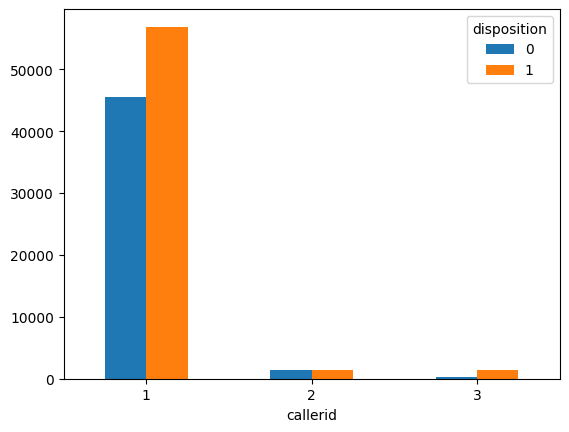

In [68]:
# Creating crosstab
crosstb = pd.crosstab(df_tr.callerid, df_tr.disposition)
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

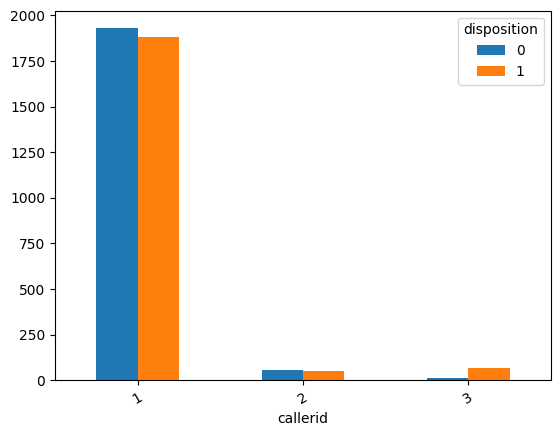

In [69]:
# Creating crosstab
crosstb = pd.crosstab(df_ts.callerid, df_ts.disposition)
 
# Creating barplot
barplot = crosstb.plot.bar(rot=30)

* Çağrı yapan operatörlerden idsi 3 olan büyük oranda kendisine cevap verilmiş. çok az bir miktarı kendisine cevap vermemiş (eğitim ve test verisi benzer). Bu durum aramış olduğu zaman dilimine göre olabilir. Tarih bilgilerini de incelemek gerekir.
* Operatör idsi 2 olan eğitim ve test verisinde nerdeyse eşit miktarda cevap almışken, idsi 1 olan ise eğitim verisinde daha çok cevap almışken, test verisinde daha az cevap almış-oransal olarak-. Bunun nedeni arama saatleri vs gibi durumlar olabilir. O yüzden tarihsel bazlı özellik çıkarımı-feature extraction- yapmak faydalı olabilir. 

#### Feature Engineering

* Önce her aranan kişi için en son zaman arandığı bilgisini dakika cinsinden bulalım. En son aranma bilgisi çağrıya cevap verme hususunda yararlı bir bilgi olabilir

In [70]:
# Convert 'call_start_time' column to datetime if it's not already in datetime format
df_tr['call_start_time'] = pd.to_datetime(df_tr['call_start_time'])
                                       
# Sort the DataFrame by 'called_num' and 'call_start_time' in ascending order
df_tr.sort_values(['called_num', 'call_start_time'], ascending=True, inplace=True)

# Calculate the time difference in minutes since the last call for each 'called_num'
df_tr['last_call_diff'] = df_tr.groupby('called_num')['call_start_time'].diff().dt.total_seconds() / 60
                                          
df_tr.head()

called_num     call_start_time callerid  disposition  last_call_diff
13776         -1 2018-11-14 18:54:27        3            1             NaN
21177         -1 2018-11-14 19:16:26        3            1       21.983333
10292         -1 2018-11-14 19:26:08        3            1        9.700000
99756         -1 2018-11-14 19:27:01        3            1        0.883333
98043         -1 2018-11-14 20:19:02        3            1       52.016667

In [71]:
df_tr.isnull().sum()

called_num           0
call_start_time      0
callerid             0
disposition          0
last_call_diff     430
dtype: int64

C:\Users\ugrceyln\AppData\Local\Temp\ipykernel_2200\135547280.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_tr.last_call_diff[(df_tr["disposition"] == 1) ],
C:\Users\ugrceyln\AppData\Local\Temp\ipykernel_2200\135547280.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_tr.last_call_diff[(df_tr["disposition"] == 0) ],


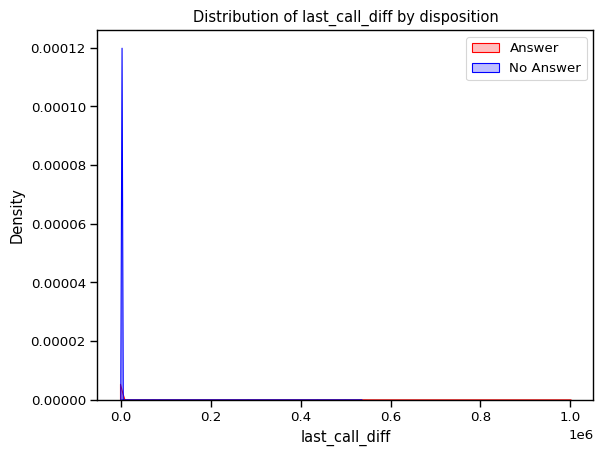

In [72]:
df_tr["last_call_diff"]

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_tr.last_call_diff[(df_tr["disposition"] == 1) ],
                color="Red", shade = True);
ax = sns.kdeplot(df_tr.last_call_diff[(df_tr["disposition"] == 0) ],
                ax =ax, color="Blue", shade= True);

ax.legend(["Answer","No Answer"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('last_call_diff');
ax.set_title('Distribution of last_call_diff by disposition');

* Daha önce aranmayan numaralar hali ile nan değer içeriyor. Bu nan satırları mantıklı bir değerle doldırmak gerekir. 0 ya da daha yüksek bir rakam içinde yüksek bir rakam (en yüksek değerden biraz daha fazla olacak şekilde) seçmek tutarlı olabilir. Daha fazla zamandır aranmıyor manasında düşünmek için.

In [73]:
margin = 1000
fill_max = round(df_tr["last_call_diff"].max())
fill_max += margin
fill_max

1000030

In [74]:
df_tr["last_call_diff"] = df_tr["last_call_diff"].fillna(fill_max)
df_tr

called_num     call_start_time callerid  disposition  last_call_diff
13776         -1 2018-11-14 18:54:27        3            1    1.000030e+06
21177         -1 2018-11-14 19:16:26        3            1    2.198333e+01
10292         -1 2018-11-14 19:26:08        3            1    9.700000e+00
99756         -1 2018-11-14 19:27:01        3            1    8.833333e-01
98043         -1 2018-11-14 20:19:02        3            1    5.201667e+01
...          ...                 ...      ...          ...             ...
35178      98543 2021-03-06 14:14:57        1            1    1.000030e+06
34491      99226 2021-04-26 17:31:18        1            1    1.000030e+06
34093      99327 2020-09-17 10:51:19        1            0    1.000030e+06
34071      99394 2020-10-19 18:27:43        1            1    1.000030e+06
37577      99927 2020-08-05 13:44:55        1            0    1.000030e+06

[106797 rows x 5 columns]

* Aynı işlemi test verisi için uygulayalım

In [75]:
# Convert 'call_start_time' column to datetime if it's not already in datetime format
df_ts['call_start_time'] = pd.to_datetime(df_ts['call_start_time'])
                                       
# Sort the DataFrame by 'called_num' and 'call_start_time' in ascending order
df_ts.sort_values(['called_num', 'call_start_time'], ascending=True, inplace=True)

# Calculate the time difference in minutes since the last call for each 'called_num'
df_ts['last_call_diff'] = df_ts.groupby('called_num')['call_start_time'].diff().dt.total_seconds() / 60
                                          
df_ts.head()

called_num     call_start_time callerid  disposition  last_call_diff
1745         -2 2018-11-15 10:31:16        3            1             NaN
3069         -2 2018-11-15 11:32:18        3            1       61.033333
1509         -2 2018-11-15 11:43:50        3            1       11.533333
1684         -2 2018-11-15 14:38:20        3            1      174.500000
2933         -2 2018-11-15 16:44:36        3            1      126.266667

In [76]:
df_ts.isnull().sum()

called_num           0
call_start_time      0
callerid             0
disposition          0
last_call_diff     430
dtype: int64

C:\Users\ugrceyln\AppData\Local\Temp\ipykernel_2200\1165791965.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_ts.last_call_diff[(df_ts["disposition"] == 1) ],
C:\Users\ugrceyln\AppData\Local\Temp\ipykernel_2200\1165791965.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_ts.last_call_diff[(df_ts["disposition"] == 0) ],


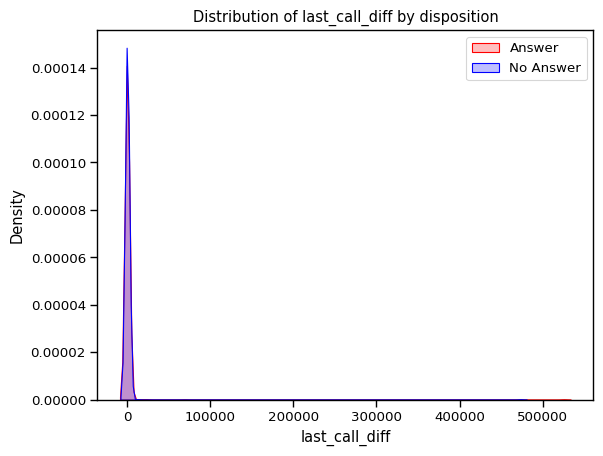

In [77]:
df_ts["last_call_diff"]

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_ts.last_call_diff[(df_ts["disposition"] == 1) ],
                color="Red", shade = True);
ax = sns.kdeplot(df_ts.last_call_diff[(df_ts["disposition"] == 0) ],
                ax =ax, color="Blue", shade= True);

ax.legend(["Answer","No Answer"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('last_call_diff');
ax.set_title('Distribution of last_call_diff by disposition');

* Eklediğimiz bu özellik disposition ile benzer bir dağılıma sahip. Arttığı azaldığına göre benzer bir dağılımda

In [78]:
df_ts["last_call_diff"] = df_ts["last_call_diff"].fillna(fill_max)
df_ts

called_num     call_start_time callerid  disposition  last_call_diff
1745         -2 2018-11-15 10:31:16        3            1    1.000030e+06
3069         -2 2018-11-15 11:32:18        3            1    6.103333e+01
1509         -2 2018-11-15 11:43:50        3            1    1.153333e+01
1684         -2 2018-11-15 14:38:20        3            1    1.745000e+02
2933         -2 2018-11-15 16:44:36        3            1    1.262667e+02
...         ...                 ...      ...          ...             ...
276       98543 2021-03-06 14:16:09        1            1    1.000030e+06
3819      99226 2021-04-28 16:24:15        1            1    1.000030e+06
1761      99327 2021-08-06 14:19:34        1            1    1.000030e+06
1525      99394 2020-10-10 16:32:11        1            0    1.000030e+06
3520      99927 2020-08-05 13:53:14        1            0    1.000030e+06

[3998 rows x 5 columns]

* Şimdi de eğitim ve test verini - hangisi test hangisi değil bilgisini-is_test- ekleyerek- bu veriler üzerinde tarih bilgisi ile birtakım özellikler çıkarlalım 

In [79]:
df_tr["is_test"] = 0
df_ts["is_test"] = 1

df = pd.concat([df_tr, df_ts])
df.shape

(110795, 6)

In [80]:
df_ori = df.copy(deep=True)

In [81]:
df.head()

called_num     call_start_time callerid  disposition  last_call_diff  \
13776         -1 2018-11-14 18:54:27        3            1    1.000030e+06   
21177         -1 2018-11-14 19:16:26        3            1    2.198333e+01   
10292         -1 2018-11-14 19:26:08        3            1    9.700000e+00   
99756         -1 2018-11-14 19:27:01        3            1    8.833333e-01   
98043         -1 2018-11-14 20:19:02        3            1    5.201667e+01   

       is_test  
13776        0  
21177        0  
10292        0  
99756        0  
98043        0

In [82]:
df.tail()

called_num     call_start_time callerid  disposition  last_call_diff  \
276       98543 2021-03-06 14:16:09        1            1       1000030.0   
3819      99226 2021-04-28 16:24:15        1            1       1000030.0   
1761      99327 2021-08-06 14:19:34        1            1       1000030.0   
1525      99394 2020-10-10 16:32:11        1            0       1000030.0   
3520      99927 2020-08-05 13:53:14        1            0       1000030.0   

      is_test  
276         1  
3819        1  
1761        1  
1525        1  
3520        1

In [83]:
df['year'] = df.call_start_time.dt.year
df['month'] = df.call_start_time.dt.month
df['day'] = df.call_start_time.dt.day
df['hour'] = df.call_start_time.dt.hour
df['minutes'] = df.call_start_time.dt.minute

df['day_of_year'] = df.call_start_time.dt.dayofyear
df['week_of_year'] = df.call_start_time.dt.isocalendar().week
df['day_of_week'] = df.call_start_time.dt.day_of_week
df['quarter'] = df.call_start_time.dt.quarter

In [84]:
df

called_num     call_start_time callerid  disposition  last_call_diff  \
13776         -1 2018-11-14 18:54:27        3            1    1.000030e+06   
21177         -1 2018-11-14 19:16:26        3            1    2.198333e+01   
10292         -1 2018-11-14 19:26:08        3            1    9.700000e+00   
99756         -1 2018-11-14 19:27:01        3            1    8.833333e-01   
98043         -1 2018-11-14 20:19:02        3            1    5.201667e+01   
...          ...                 ...      ...          ...             ...   
276        98543 2021-03-06 14:16:09        1            1    1.000030e+06   
3819       99226 2021-04-28 16:24:15        1            1    1.000030e+06   
1761       99327 2021-08-06 14:19:34        1            1    1.000030e+06   
1525       99394 2020-10-10 16:32:11        1            0    1.000030e+06   
3520       99927 2020-08-05 13:53:14        1            0    1.000030e+06   

       is_test  year  month  day  hour  minutes  day_of_year  week_of_year  \
13776        0  2018     11   14    18       54          318            46   
21177        0  2018     11   14    19       16          318            46   
10292        0  2018     11   14    19       26          318            46   
99756        0  2018     11   14    19       27          318            46   
98043        0  2018     11   14    20       19          318            46   
...        ...   ...    ...  ...   ...      ...          ...           ...   
276          1  2021      3    6    14       16           65             9   
3819         1  2021      4   28    16       24          118            17   
1761         1  2021      8    6    14       19          218            31   
1525         1  2020     10   10    16       32          284            41   
3520         1  2020      8    5    13       53          218            32   

       day_of_week  quarter  
13776            2        4  
21177            2        4  
10292            2        4  
99756            2        4  
98043            2        4  
...            ...      ...  
276              5        1  
3819             2        2  
1761             4        3  
1525             5        4  
3520             2        3  

[110795 rows x 15 columns]

In [85]:
def day_part(hour):
    if hour in [4,5]:
        return "1" # "dawn"
    elif hour in [6,7]:
        return "2" # "early morning"
    elif hour in [8,9,10]:
        return "3" # late morning"
    elif hour in [11,12,13]:
        return "4" # "noon"
    elif hour in [14,15,16]:
        return "5" # "afternoon"
    elif hour in [17, 18,19]:
        return "6" # "evening"
    elif hour in [20, 21, 22]:
        return "7" # "night"
    elif hour in [23,24,1,2,3]:
        return "8" # "midnight"

In [86]:
df['day_part'] = df['hour'].apply(day_part)

In [87]:
df['is_year_start'] = (df['call_start_time'].dt.is_year_start).astype(int)
df['is_quarter_start'] = (df['call_start_time'].dt.is_quarter_start).astype(int)
df['is_month_start'] = (df['call_start_time'].dt.is_month_start).astype(int)
df['is_month_end'] = (df['call_start_time'].dt.is_month_end).astype(int)

In [88]:
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]), 1,0)

In [89]:
df

called_num     call_start_time callerid  disposition  last_call_diff  \
13776         -1 2018-11-14 18:54:27        3            1    1.000030e+06   
21177         -1 2018-11-14 19:16:26        3            1    2.198333e+01   
10292         -1 2018-11-14 19:26:08        3            1    9.700000e+00   
99756         -1 2018-11-14 19:27:01        3            1    8.833333e-01   
98043         -1 2018-11-14 20:19:02        3            1    5.201667e+01   
...          ...                 ...      ...          ...             ...   
276        98543 2021-03-06 14:16:09        1            1    1.000030e+06   
3819       99226 2021-04-28 16:24:15        1            1    1.000030e+06   
1761       99327 2021-08-06 14:19:34        1            1    1.000030e+06   
1525       99394 2020-10-10 16:32:11        1            0    1.000030e+06   
3520       99927 2020-08-05 13:53:14        1            0    1.000030e+06   

       is_test  year  month  day  hour  minutes  day_of_year  week_of_year  \
13776        0  2018     11   14    18       54          318            46   
21177        0  2018     11   14    19       16          318            46   
10292        0  2018     11   14    19       26          318            46   
99756        0  2018     11   14    19       27          318            46   
98043        0  2018     11   14    20       19          318            46   
...        ...   ...    ...  ...   ...      ...          ...           ...   
276          1  2021      3    6    14       16           65             9   
3819         1  2021      4   28    16       24          118            17   
1761         1  2021      8    6    14       19          218            31   
1525         1  2020     10   10    16       32          284            41   
3520         1  2020      8    5    13       53          218            32   

       day_of_week  quarter day_part  is_year_start  is_quarter_start  \
13776            2        4        6              0                 0   
21177            2        4        6              0                 0   
10292            2        4        6              0                 0   
99756            2        4        6              0                 0   
98043            2        4        7              0                 0   
...            ...      ...      ...            ...               ...   
276              5        1        5              0                 0   
3819             2        2        5              0                 0   
1761             4        3        5              0                 0   
1525             5        4        5              0                 0   
3520             2        3        4              0                 0   

       is_month_start  is_month_end  is_weekend  
13776               0             0           0  
21177               0             0           0  
10292               0             0           0  
99756               0             0           0  
98043               0             0           0  
...               ...           ...         ...  
276                 0             0           1  
3819                0             0           0  
1761                0             0           0  
1525                0             0           1  
3520                0             0           0  

[110795 rows x 21 columns]

* Kategorik olarak alınması gereken özellikler -özellikle one-hot-encoder uygulanması gerekenler- nerdeyse tamamı. Fakat feature sayısını fazla arttıracağından ve veri sayısı buna nispeten az olduğundan -curse of dimentional problemi- şimdilik sadece unique veri sayısı az olan özelliklere one-hot-encoder diğer kalanlara label encoder uygulanmış hali ile özellik seçiminde bulunacağız. 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110795 entries, 13776 to 3520
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   called_num        110795 non-null  object        
 1   call_start_time   110795 non-null  datetime64[ns]
 2   callerid          110795 non-null  object        
 3   disposition       110795 non-null  int64         
 4   last_call_diff    110795 non-null  float64       
 5   is_test           110795 non-null  int64         
 6   year              110795 non-null  int64         
 7   month             110795 non-null  int64         
 8   day               110795 non-null  int64         
 9   hour              110795 non-null  int64         
 10  minutes           110795 non-null  int64         
 11  day_of_year       110795 non-null  int64         
 12  week_of_year      110795 non-null  UInt32        
 13  day_of_week       110795 non-null  int64         
 14  qu

In [91]:
df_x = df.drop(["call_start_time"], axis=1)
df_x.head()

called_num callerid  disposition  last_call_diff  is_test  year  month  \
13776         -1        3            1    1.000030e+06        0  2018     11   
21177         -1        3            1    2.198333e+01        0  2018     11   
10292         -1        3            1    9.700000e+00        0  2018     11   
99756         -1        3            1    8.833333e-01        0  2018     11   
98043         -1        3            1    5.201667e+01        0  2018     11   

       day  hour  minutes  day_of_year  week_of_year  day_of_week  quarter  \
13776   14    18       54          318            46            2        4   
21177   14    19       16          318            46            2        4   
10292   14    19       26          318            46            2        4   
99756   14    19       27          318            46            2        4   
98043   14    20       19          318            46            2        4   

      day_part  is_year_start  is_quarter_start  is_month_start  is_month_end  \
13776        6              0                 0               0             0   
21177        6              0                 0               0             0   
10292        6              0                 0               0             0   
99756        6              0                 0               0             0   
98043        7              0                 0               0             0   

       is_weekend  
13776           0  
21177           0  
10292           0  
99756           0  
98043           0

In [92]:
for col in df_x.columns:
    print(col, df_x[col].nunique())
    # print(df_x[col].value_counts())

called_num 431
callerid 3
disposition 2
last_call_diff 5369
is_test 2
year 5
month 12
day 31
hour 16
minutes 60
day_of_year 366
week_of_year 53
day_of_week 7
quarter 4
day_part 6
is_year_start 2
is_quarter_start 2
is_month_start 2
is_month_end 2
is_weekend 2


In [93]:
field_one_hot = ["callerid", "year", "month", "day_of_week", "quarter", "day_part", "is_weekend"]

In [94]:
def apply_one_hot_encoder(data, field_one_hot):

    data[col] = data[col].astype("category")

    data = pd.get_dummies(data=data, columns=field_one_hot)
    field_one_hot = data.columns.tolist()

    return data, field_one_hot

In [95]:
data, field_one_hot = apply_one_hot_encoder(df_x, field_one_hot)
data.head()

called_num  disposition  last_call_diff  is_test  day  hour  minutes  \
13776         -1            1    1.000030e+06        0   14    18       54   
21177         -1            1    2.198333e+01        0   14    19       16   
10292         -1            1    9.700000e+00        0   14    19       26   
99756         -1            1    8.833333e-01        0   14    19       27   
98043         -1            1    5.201667e+01        0   14    20       19   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776          318            46              0                 0   
21177          318            46              0                 0   
10292          318            46              0                 0   
99756          318            46              0                 0   
98043          318            46              0                 0   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
13776               0             0           0           0           1   
21177               0             0           0           0           1   
10292               0             0           0           0           1   
99756               0             0           0           0           1   
98043               0             0           0           0           1   

       year_2018  year_2019  year_2020  year_2021  year_2022  month_1  \
13776          1          0          0          0          0        0   
21177          1          0          0          0          0        0   
10292          1          0          0          0          0        0   
99756          1          0          0          0          0        0   
98043          1          0          0          0          0        0   

       month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
13776        0        0        0        0        0        0        0        0   
21177        0        0        0        0        0        0        0        0   
10292        0        0        0        0        0        0        0        0   
99756        0        0        0        0        0        0        0        0   
98043        0        0        0        0        0        0        0        0   

       month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
13776         0         1         0              0              0   
21177         0         1         0              0              0   
10292         0         1         0              0              0   
99756         0         1         0              0              0   
98043         0         1         0              0              0   

       day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
13776              1              0              0              0   
21177              1              0              0              0   
10292              1              0              0              0   
99756              1              0              0              0   
98043              1              0              0              0   

       day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
13776              0          0          0          0          1           0   
21177              0          0          0          0          1           0   
10292              0          0          0          0          1           0   
99756              0          0          0          0          1           0   
98043              0          0          0          0          1           0   

       day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
13776           0           0           1           0           0   
21177           0           0           1           0           0   
10292           0           0           1           0           0   
99756           0           0           1           0           0   
98043           0           0           0           1           0   

       is_weekend_0

In [96]:
data.shape

(110795, 52)

Aranan numaralar için yeni bir özellik ekleyip, test ve eğitim verisinde ortak olanlar için one-hot uygulancak şekilde bir özellik ekleyelim

In [97]:
data["is_common_called_nums"] = 1
data.loc[data["called_num"].isin(["-1", "-2"]), "is_common_called_nums"] = 0
data

called_num  disposition  last_call_diff  is_test  day  hour  minutes  \
13776         -1            1    1.000030e+06        0   14    18       54   
21177         -1            1    2.198333e+01        0   14    19       16   
10292         -1            1    9.700000e+00        0   14    19       26   
99756         -1            1    8.833333e-01        0   14    19       27   
98043         -1            1    5.201667e+01        0   14    20       19   
...          ...          ...             ...      ...  ...   ...      ...   
276        98543            1    1.000030e+06        1    6    14       16   
3819       99226            1    1.000030e+06        1   28    16       24   
1761       99327            1    1.000030e+06        1    6    14       19   
1525       99394            0    1.000030e+06        1   10    16       32   
3520       99927            0    1.000030e+06        1    5    13       53   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776          318            46              0                 0   
21177          318            46              0                 0   
10292          318            46              0                 0   
99756          318            46              0                 0   
98043          318            46              0                 0   
...            ...           ...            ...               ...   
276             65             9              0                 0   
3819           118            17              0                 0   
1761           218            31              0                 0   
1525           284            41              0                 0   
3520           218            32              0                 0   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
13776               0             0           0           0           1   
21177               0             0           0           0           1   
10292               0             0           0           0           1   
99756               0             0           0           0           1   
98043               0             0           0           0           1   
...               ...           ...         ...         ...         ...   
276                 0             0           1           0           0   
3819                0             0           1           0           0   
1761                0             0           1           0           0   
1525                0             0           1           0           0   
3520                0             0           1           0           0   

       year_2018  year_2019  year_2020  year_2021  year_2022  month_1  \
13776          1          0          0          0          0        0   
21177          1          0          0          0          0        0   
10292          1          0          0          0          0        0   
99756          1          0          0          0          0        0   
98043          1          0          0          0          0        0   
...          ...        ...        ...        ...        ...      ...   
276            0          0          0          1          0        0   
3819           0          0          0          1          0        0   
1761           0          0          0          1          0        0   
1525           0          0          1          0          0        0   
3520           0          0          1          0          0        0   

       month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
13776        0        0        0        0        0        0        0        0   
21177        0        0        0        0        0        0        0        0   
10292        0        0        0        0        0        0        0        0   
99756        0        0        0        0        0        0        0        0   
98043        0        0        0        0        0       

In [98]:

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data["called_num"] = le.fit_transform(data["called_num"])    
data.head()

called_num  disposition  last_call_diff  is_test  day  hour  minutes  \
13776           0            1    1.000030e+06        0   14    18       54   
21177           0            1    2.198333e+01        0   14    19       16   
10292           0            1    9.700000e+00        0   14    19       26   
99756           0            1    8.833333e-01        0   14    19       27   
98043           0            1    5.201667e+01        0   14    20       19   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776          318            46              0                 0   
21177          318            46              0                 0   
10292          318            46              0                 0   
99756          318            46              0                 0   
98043          318            46              0                 0   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
13776               0             0           0           0           1   
21177               0             0           0           0           1   
10292               0             0           0           0           1   
99756               0             0           0           0           1   
98043               0             0           0           0           1   

       year_2018  year_2019  year_2020  year_2021  year_2022  month_1  \
13776          1          0          0          0          0        0   
21177          1          0          0          0          0        0   
10292          1          0          0          0          0        0   
99756          1          0          0          0          0        0   
98043          1          0          0          0          0        0   

       month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
13776        0        0        0        0        0        0        0        0   
21177        0        0        0        0        0        0        0        0   
10292        0        0        0        0        0        0        0        0   
99756        0        0        0        0        0        0        0        0   
98043        0        0        0        0        0        0        0        0   

       month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
13776         0         1         0              0              0   
21177         0         1         0              0              0   
10292         0         1         0              0              0   
99756         0         1         0              0              0   
98043         0         1         0              0              0   

       day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
13776              1              0              0              0   
21177              1              0              0              0   
10292              1              0              0              0   
99756              1              0              0              0   
98043              1              0              0              0   

       day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
13776              0          0          0          0          1           0   
21177              0          0          0          0          1           0   
10292              0          0          0          0          1           0   
99756              0          0          0          0          1           0   
98043              0          0          0          0          1           0   

       day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
13776           0           0           1           0           0   
21177           0           0           1           0           0   
10292           0           0           1           0           0   
99756           0           0           1           0           0   
98043           0           0           0           1           0   

       is_week

In [99]:
data.tail()

called_num  disposition  last_call_diff  is_test  day  hour  minutes  \
276          426            1       1000030.0        1    6    14       16   
3819         427            1       1000030.0        1   28    16       24   
1761         428            1       1000030.0        1    6    14       19   
1525         429            0       1000030.0        1   10    16       32   
3520         430            0       1000030.0        1    5    13       53   

      day_of_year  week_of_year  is_year_start  is_quarter_start  \
276            65             9              0                 0   
3819          118            17              0                 0   
1761          218            31              0                 0   
1525          284            41              0                 0   
3520          218            32              0                 0   

      is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
276                0             0           1           0           0   
3819               0             0           1           0           0   
1761               0             0           1           0           0   
1525               0             0           1           0           0   
3520               0             0           1           0           0   

      year_2018  year_2019  year_2020  year_2021  year_2022  month_1  month_2  \
276           0          0          0          1          0        0        0   
3819          0          0          0          1          0        0        0   
1761          0          0          0          1          0        0        0   
1525          0          0          1          0          0        0        0   
3520          0          0          1          0          0        0        0   

      month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
276         1        0        0        0        0        0        0         0   
3819        0        1        0        0        0        0        0         0   
1761        0        0        0        0        0        1        0         0   
1525        0        0        0        0        0        0        0         1   
3520        0        0        0        0        0        1        0         0   

      month_11  month_12  day_of_week_0  day_of_week_1  day_of_week_2  \
276          0         0              0              0              0   
3819         0         0              0              0              1   
1761         0         0              0              0              0   
1525         0         0              0              0              0   
3520         0         0              0              0              1   

      day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  quarter_1  \
276               0              0              1              0          1   
3819              0              0              0              0          0   
1761              0              1              0              0          0   
1525              0              0              1              0          0   
3520              0              0              0              0          0   

      quarter_2  quarter_3  quarter_4  day_part_3  day_part_4  day_part_5  \
276           0          0          0           0           0           1   
3819          1          0          0           0           0           1   
1761          0          1          0           0           0           1   
1525          0          0          1           0           0           1   
3520          0          1          0           0           1           0   

      day_part_6  day_part_7  day_part_8  is_weekend_0  is_weekend_1  \
276            0           0           0             0             1   
3819           0           0           0             1             0   
1761           0           0           0             1             0   
1525           0           0           0    

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110795 entries, 13776 to 3520
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   called_num             110795 non-null  int32  
 1   disposition            110795 non-null  int64  
 2   last_call_diff         110795 non-null  float64
 3   is_test                110795 non-null  int64  
 4   day                    110795 non-null  int64  
 5   hour                   110795 non-null  int64  
 6   minutes                110795 non-null  int64  
 7   day_of_year            110795 non-null  int64  
 8   week_of_year           110795 non-null  UInt32 
 9   is_year_start          110795 non-null  int32  
 10  is_quarter_start       110795 non-null  int32  
 11  is_month_start         110795 non-null  int32  
 12  is_month_end           110795 non-null  int32  
 13  callerid_1             110795 non-null  uint8  
 14  callerid_2             110795 non-

In [103]:
data_tr = data.loc[data["is_test"] == 0]
data_ts = data.loc[data["is_test"] == 1]

data_tr = data_tr.drop(["is_test"], axis=1)
data_ts = data_ts.drop(["is_test"], axis=1)

data_tr.shape, data_ts.shape

((106797, 52), (3998, 52))

In [104]:
data_tr.tail()

called_num  disposition  last_call_diff  day  hour  minutes  \
35178         426            1       1000030.0    6    14       14   
34491         427            1       1000030.0   26    17       31   
34093         428            0       1000030.0   17    10       51   
34071         429            1       1000030.0   19    18       27   
37577         430            0       1000030.0    5    13       44   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
35178           65             9              0                 0   
34491          116            17              0                 0   
34093          261            38              0                 0   
34071          293            43              0                 0   
37577          218            32              0                 0   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
35178               0             0           1           0           0   
34491               0             0           1           0           0   
34093               0             0           1           0           0   
34071               0             0           1           0           0   
37577               0             0           1           0           0   

       year_2018  year_2019  year_2020  year_2021  year_2022  month_1  \
35178          0          0          0          1          0        0   
34491          0          0          0          1          0        0   
34093          0          0          1          0          0        0   
34071          0          0          1          0          0        0   
37577          0          0          1          0          0        0   

       month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
35178        0        1        0        0        0        0        0        0   
34491        0        0        1        0        0        0        0        0   
34093        0        0        0        0        0        0        0        1   
34071        0        0        0        0        0        0        0        0   
37577        0        0        0        0        0        0        1        0   

       month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
35178         0         0         0              0              0   
34491         0         0         0              1              0   
34093         0         0         0              0              0   
34071         1         0         0              1              0   
37577         0         0         0              0              0   

       day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
35178              0              0              0              1   
34491              0              0              0              0   
34093              0              1              0              0   
34071              0              0              0              0   
37577              1              0              0              0   

       day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
35178              0          1          0          0          0           0   
34491              0          0          1          0          0           0   
34093              0          0          0          1          0           1   
34071              0          0          0          0          1           0   
37577              0          0          0          1          0           0   

       day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
35178           0           1           0           0           0   
34491           0           0           1           0           0   
34093           0           0           0           0           0   
34071           0           0           1           0           0   
37577           1           0           0           0           0   

       is_weekend_0  is_weekend_1  is_common_called_nums  
35178    

In [105]:
data_ts.tail()

called_num  disposition  last_call_diff  day  hour  minutes  \
276          426            1       1000030.0    6    14       16   
3819         427            1       1000030.0   28    16       24   
1761         428            1       1000030.0    6    14       19   
1525         429            0       1000030.0   10    16       32   
3520         430            0       1000030.0    5    13       53   

      day_of_year  week_of_year  is_year_start  is_quarter_start  \
276            65             9              0                 0   
3819          118            17              0                 0   
1761          218            31              0                 0   
1525          284            41              0                 0   
3520          218            32              0                 0   

      is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
276                0             0           1           0           0   
3819               0             0           1           0           0   
1761               0             0           1           0           0   
1525               0             0           1           0           0   
3520               0             0           1           0           0   

      year_2018  year_2019  year_2020  year_2021  year_2022  month_1  month_2  \
276           0          0          0          1          0        0        0   
3819          0          0          0          1          0        0        0   
1761          0          0          0          1          0        0        0   
1525          0          0          1          0          0        0        0   
3520          0          0          1          0          0        0        0   

      month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
276         1        0        0        0        0        0        0         0   
3819        0        1        0        0        0        0        0         0   
1761        0        0        0        0        0        1        0         0   
1525        0        0        0        0        0        0        0         1   
3520        0        0        0        0        0        1        0         0   

      month_11  month_12  day_of_week_0  day_of_week_1  day_of_week_2  \
276          0         0              0              0              0   
3819         0         0              0              0              1   
1761         0         0              0              0              0   
1525         0         0              0              0              0   
3520         0         0              0              0              1   

      day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  quarter_1  \
276               0              0              1              0          1   
3819              0              0              0              0          0   
1761              0              1              0              0          0   
1525              0              0              1              0          0   
3520              0              0              0              0          0   

      quarter_2  quarter_3  quarter_4  day_part_3  day_part_4  day_part_5  \
276           0          0          0           0           0           1   
3819          1          0          0           0           0           1   
1761          0          1          0           0           0           1   
1525          0          0          1           0           0           1   
3520          0          1          0           0           1           0   

      day_part_6  day_part_7  day_part_8  is_weekend_0  is_weekend_1  \
276            0           0           0             0             1   
3819           0           0           0             1             0   
1761           0           0           0             1             0   
1525           0           0           0             0             1   
3520           0          

#### Feature Selection

* Numerik özellik olarak `last_call_diff` diyebileceğimiz sadece minute olabilir. Kalan özellikler categorik olarak değerlendirilebilir. Bu yüzden özellik önemi için chi square yöntemini kullanabiliriz. 
* Numerik özellikler de olsaydı farklı özellik seçimi kullanabilrdik. Örneğin ANOVA gibi
* Yine de bu iki yöntemi sonuçları görmek için kullanacağız

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import f_classif

In [107]:
df_dummy = data_tr.copy()

In [108]:
cat_cols = df_dummy.columns.difference(["disposition"])
cat_cols

Index(['called_num', 'callerid_1', 'callerid_2', 'callerid_3', 'day',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_year',
       'day_part_3', 'day_part_4', 'day_part_5', 'day_part_6', 'day_part_7',
       'day_part_8', 'hour', 'is_common_called_nums', 'is_month_end',
       'is_month_start', 'is_quarter_start', 'is_weekend_0', 'is_weekend_1',
       'is_year_start', 'last_call_diff', 'minutes', 'month_1', 'month_10',
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'week_of_year', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022'],
      dtype='object')

In [109]:
features = df_dummy.loc[:,cat_cols]
target = df_dummy.loc[:,'disposition']

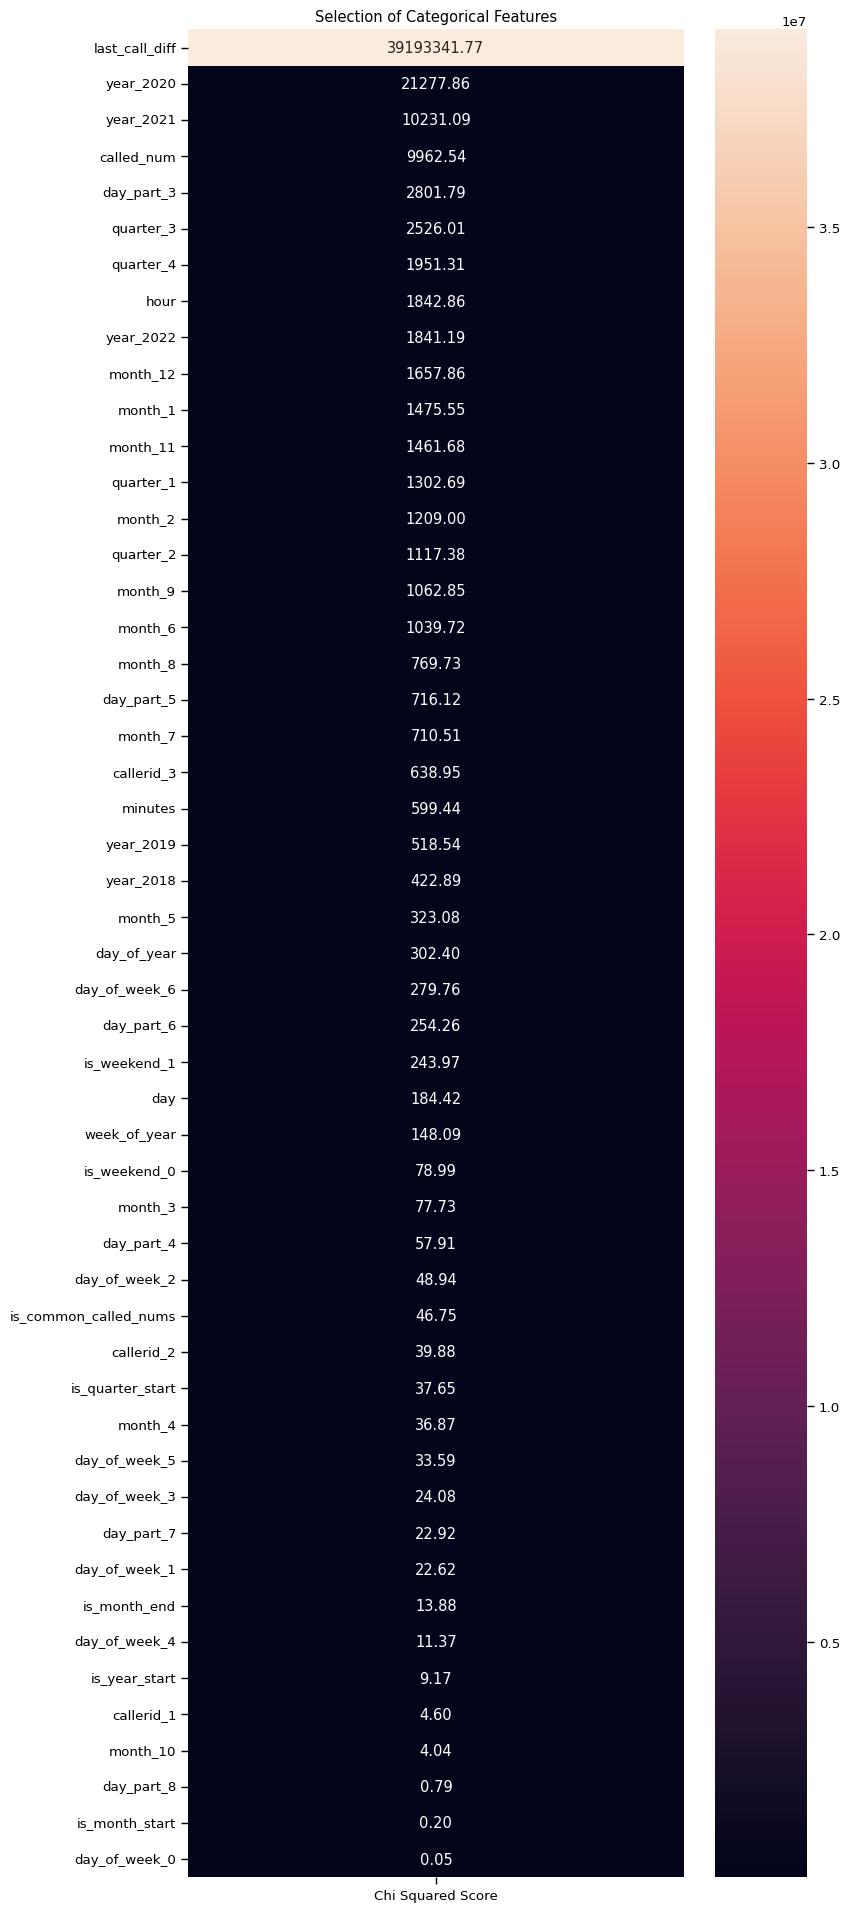

In [110]:
best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (8, 24))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,fmt = '.2f');
plt.title('Selection of Categorical Features');

In [111]:
num_cols = cat_cols.tolist()

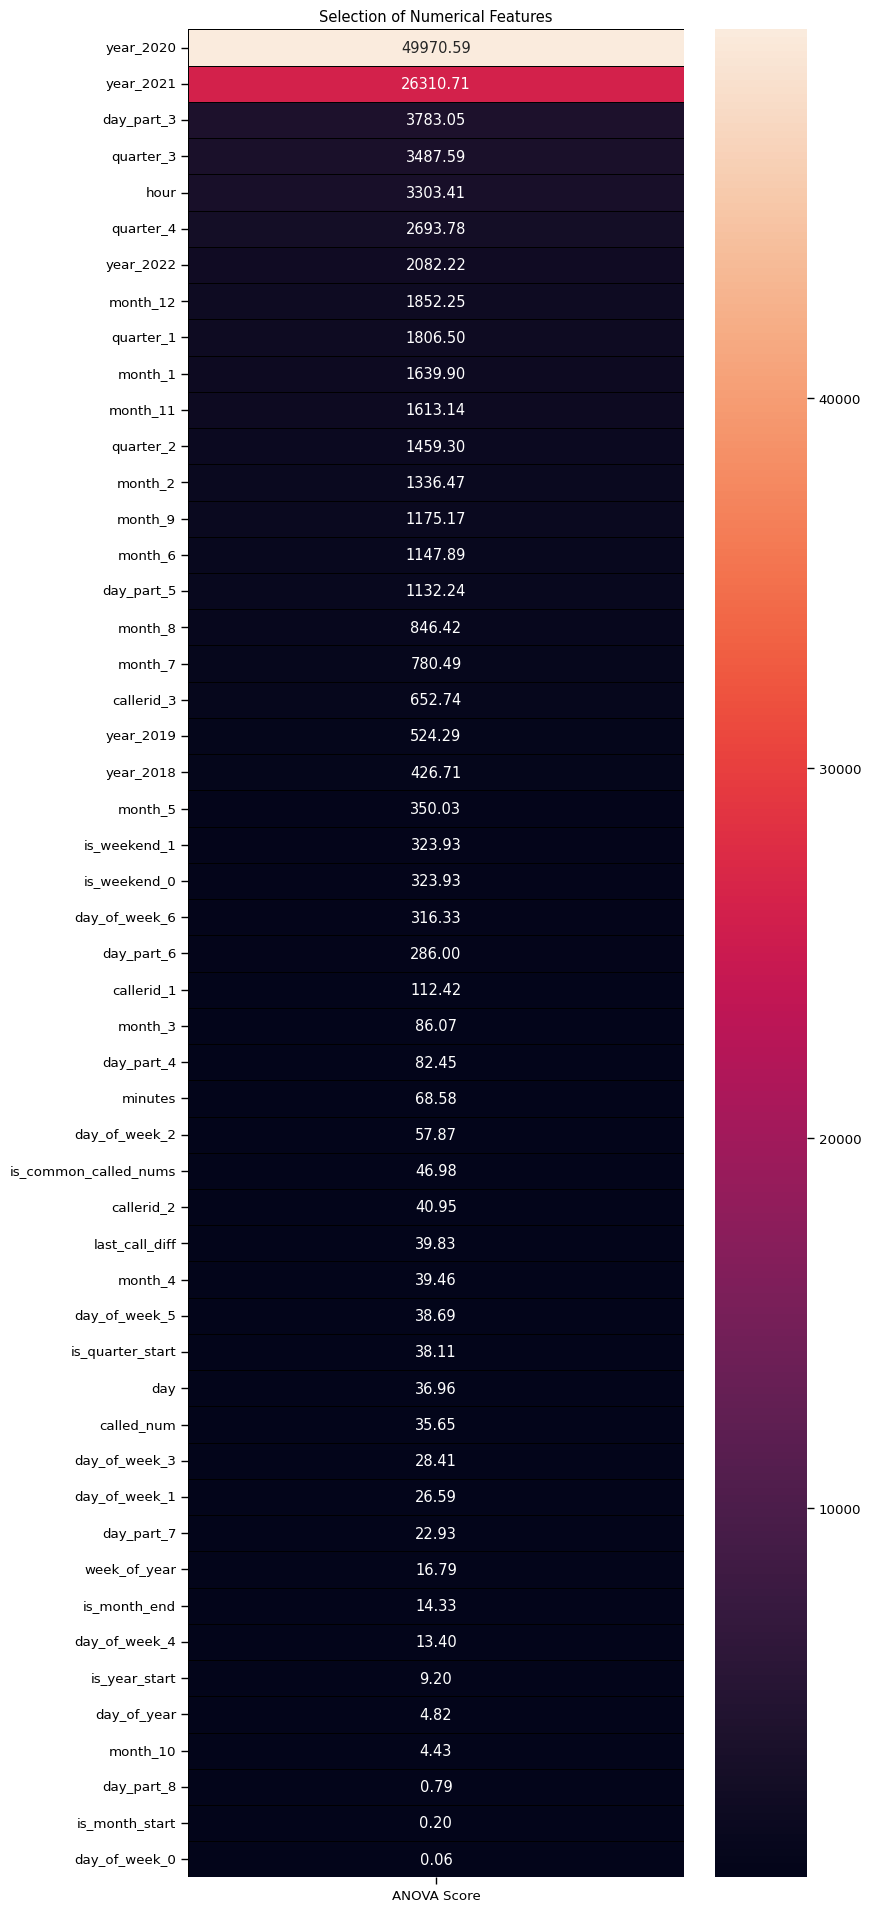

In [112]:
features = df_dummy.loc[:,num_cols]
target = df_dummy.loc[:,'disposition']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores_num = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (8, 24))
sns.heatmap(featureScores_num.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

* It give very different results. So we drop only 4 for now and try another feature engineering features

In [113]:
drop_cols_cat = featureScores.sort_values(ascending = False,by = 'Chi Squared Score')[-4:].index
drop_cols_num = featureScores_num.sort_values(ascending = False,by = 'ANOVA Score')[-4:].index

drop_cols = set(drop_cols_cat.tolist() + drop_cols_num.tolist())
drop_cols

{'day_of_week_0', 'day_part_8', 'is_month_start', 'month_10'}

In [114]:
df_dummy.drop(columns = drop_cols,inplace = True)
df_dummy.head()

called_num  disposition  last_call_diff  day  hour  minutes  \
13776           0            1    1.000030e+06   14    18       54   
21177           0            1    2.198333e+01   14    19       16   
10292           0            1    9.700000e+00   14    19       26   
99756           0            1    8.833333e-01   14    19       27   
98043           0            1    5.201667e+01   14    20       19   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776          318            46              0                 0   
21177          318            46              0                 0   
10292          318            46              0                 0   
99756          318            46              0                 0   
98043          318            46              0                 0   

       is_month_end  callerid_1  callerid_2  callerid_3  year_2018  year_2019  \
13776             0           0           0           1          1          0   
21177             0           0           0           1          1          0   
10292             0           0           0           1          1          0   
99756             0           0           0           1          1          0   
98043             0           0           0           1          1          0   

       year_2020  year_2021  year_2022  month_1  month_2  month_3  month_4  \
13776          0          0          0        0        0        0        0   
21177          0          0          0        0        0        0        0   
10292          0          0          0        0        0        0        0   
99756          0          0          0        0        0        0        0   
98043          0          0          0        0        0        0        0   

       month_5  month_6  month_7  month_8  month_9  month_11  month_12  \
13776        0        0        0        0        0         1         0   
21177        0        0        0        0        0         1         0   
10292        0        0        0        0        0         1         0   
99756        0        0        0        0        0         1         0   
98043        0        0        0        0        0         1         0   

       day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
13776              0              1              0              0   
21177              0              1              0              0   
10292              0              1              0              0   
99756              0              1              0              0   
98043              0              1              0              0   

       day_of_week_5  day_of_week_6  quarter_1  quarter_2  quarter_3  \
13776              0              0          0          0          0   
21177              0              0          0          0          0   
10292              0              0          0          0          0   
99756              0              0          0          0          0   
98043              0              0          0          0          0   

       quarter_4  day_part_3  day_part_4  day_part_5  day_part_6  day_part_7  \
13776          1           0           0           0           1           0   
21177          1           0           0           0           1           0   
10292          1           0           0           0           1           0   
99756          1           0           0           0           1           0   
98043          1           0           0           0           0           1   

       is_weekend_0  is_weekend_1  is_common_called_nums  
13776             1             0                      0  
21177             1             0                      0  
10292             1             0                      0  
99756             1             0                      0  
98043             1             0                      0

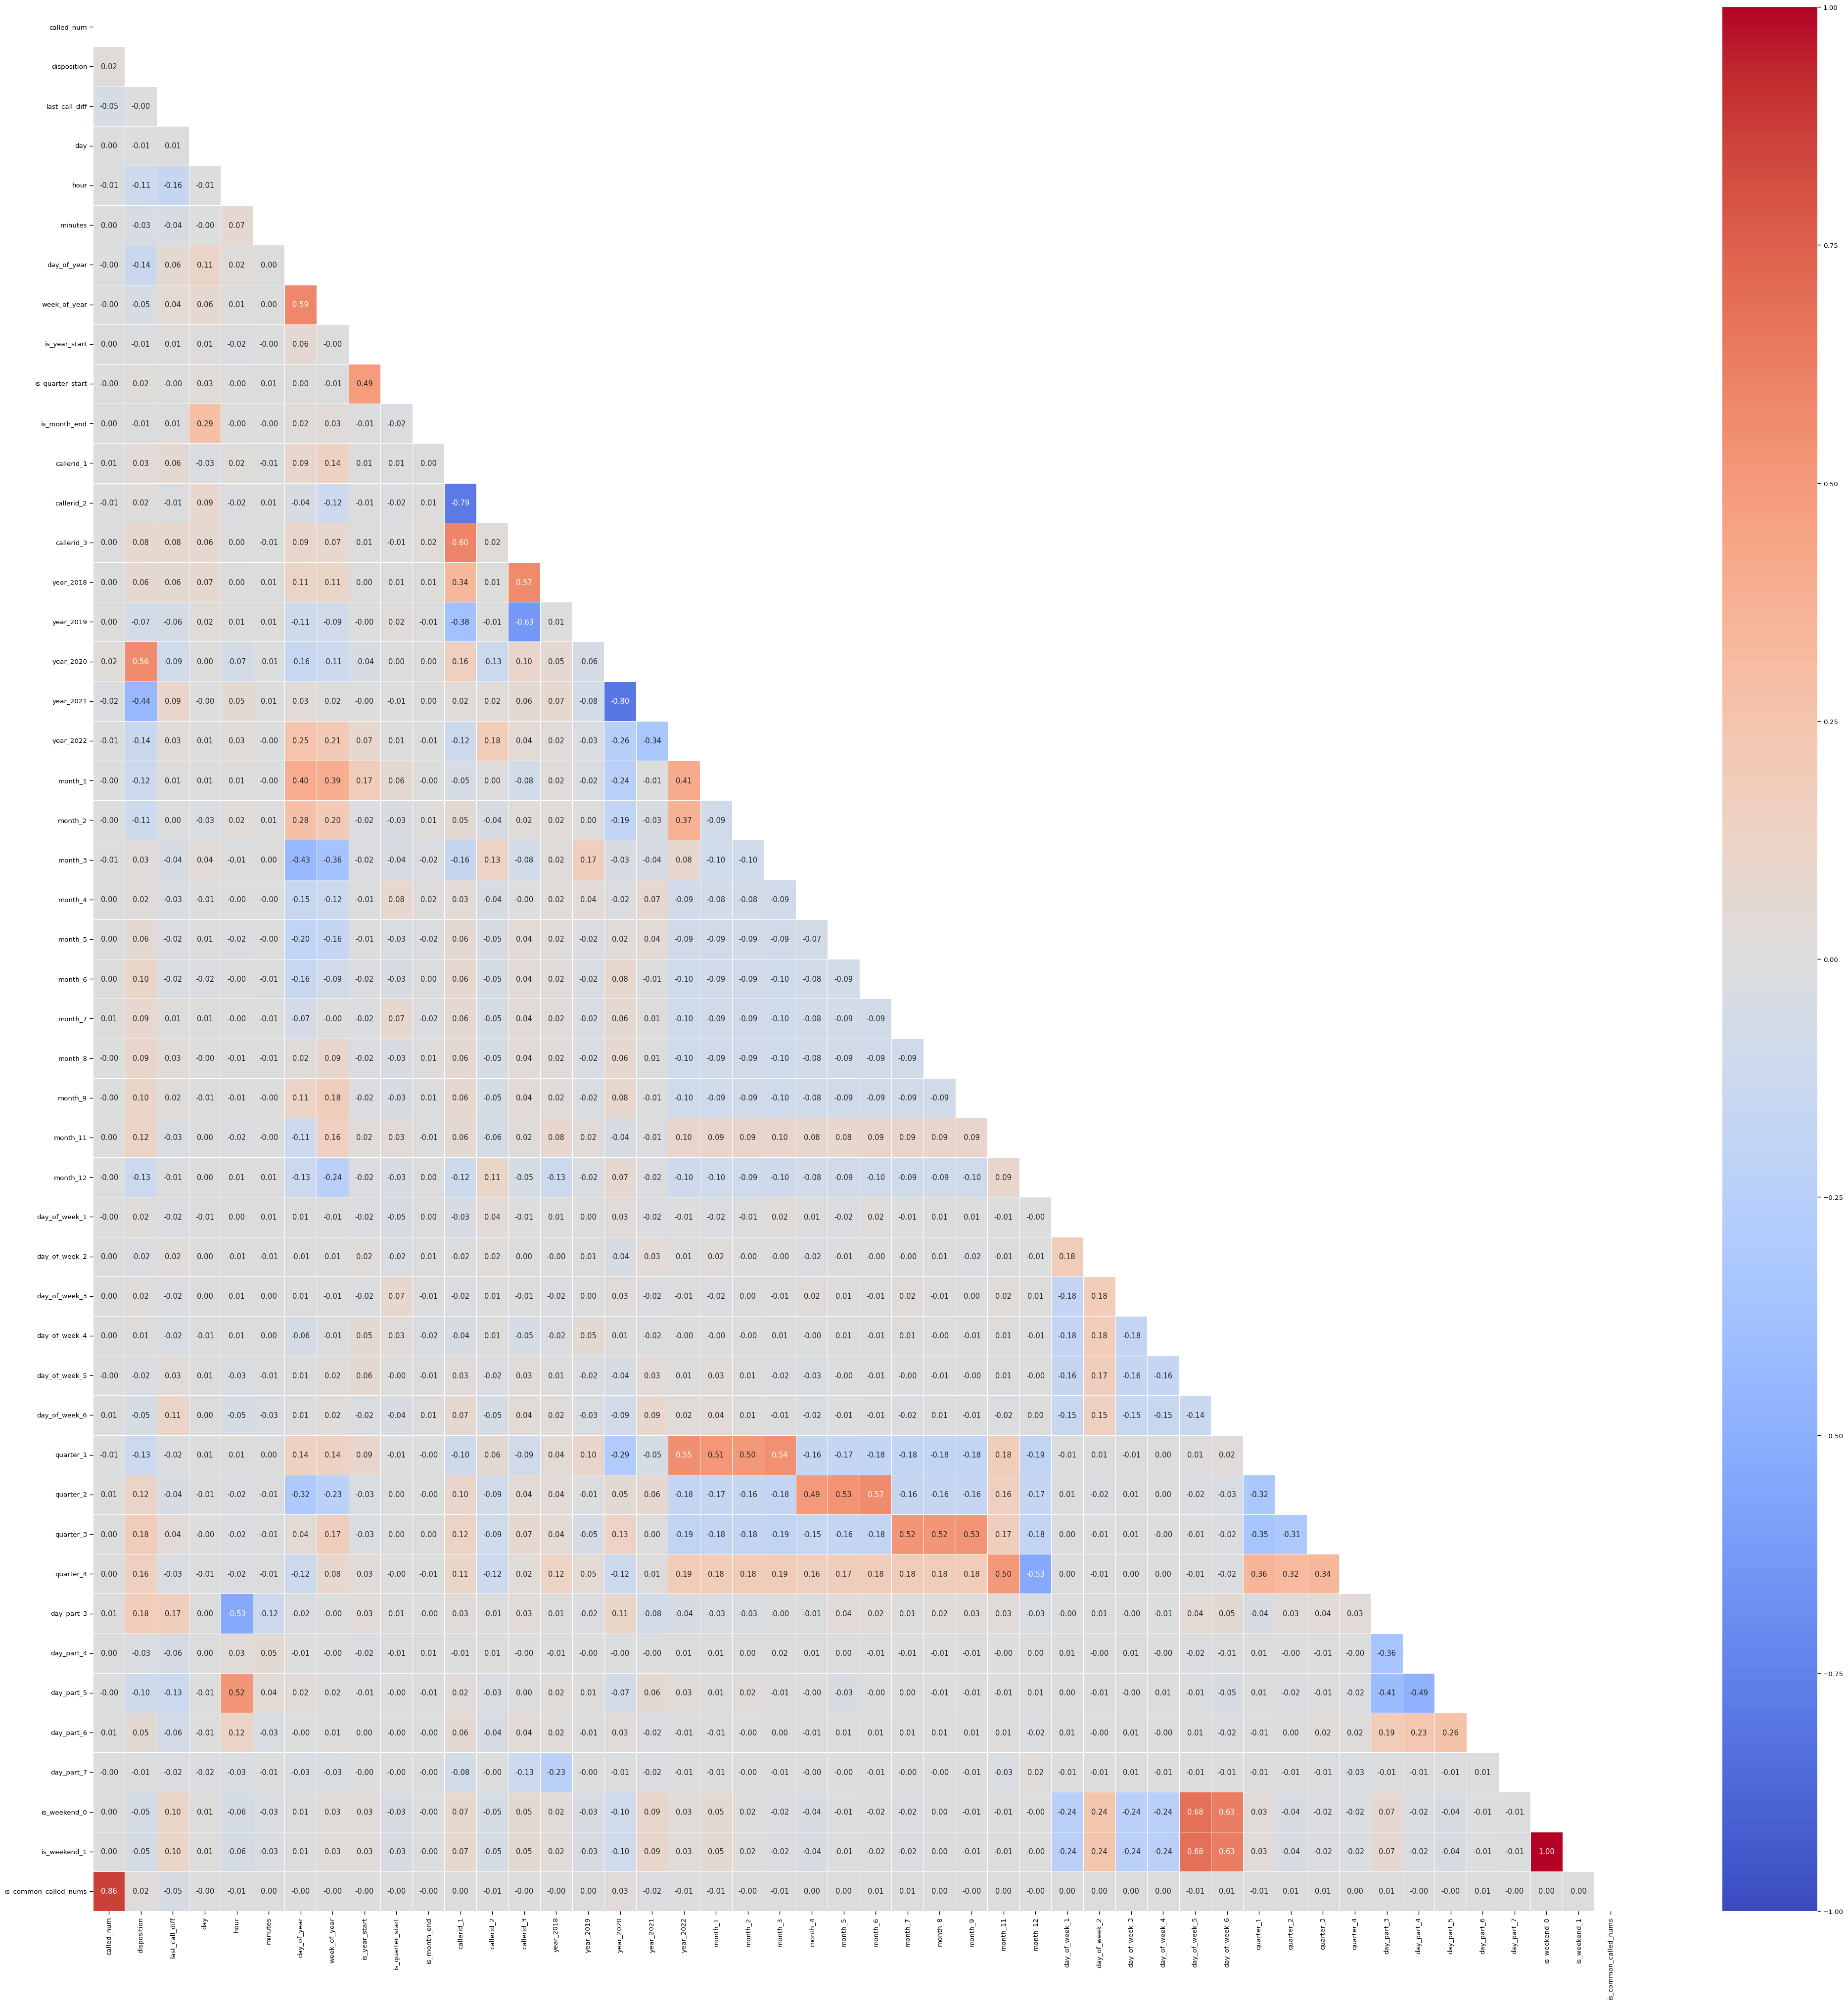

In [115]:
plt.figure(figsize=(50, 50))

corr = df_dummy.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.7, cmap='coolwarm', vmin=-1, vmax=1,fmt = '.2f')

In [116]:
# corr = df_dummy.apply(lambda x: pd.factorize(x)[0]).corr()
# corr

* Yüksek oranda korelasyona sahip iki özellik olmadığını görüyoruz (multi-colinearity sebep olacak özellikler yok)

In [120]:
def get_correlation_data(df, threshold=0.9, except_columns=[]):

    features = list(set(df.columns).difference(except_columns))

    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = df[features].corr()
    corr_matrix = corr_matrix.round(decimals=2)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]  # deleting the column from the dataset
                    print("deleted: ", colname)
                    
    return df

In [121]:
# dfx = get_correlation_data(df_dummy, threshold=0.9, except_columns=["disposition"])
# dfx

In [122]:
train_df = data_tr.copy() # data.drop(["is_test"], axis=1) #  
train_df.head()

called_num  disposition  last_call_diff  day  hour  minutes  \
13776           0            1    1.000030e+06   14    18       54   
21177           0            1    2.198333e+01   14    19       16   
10292           0            1    9.700000e+00   14    19       26   
99756           0            1    8.833333e-01   14    19       27   
98043           0            1    5.201667e+01   14    20       19   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776          318            46              0                 0   
21177          318            46              0                 0   
10292          318            46              0                 0   
99756          318            46              0                 0   
98043          318            46              0                 0   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
13776               0             0           0           0           1   
21177               0             0           0           0           1   
10292               0             0           0           0           1   
99756               0             0           0           0           1   
98043               0             0           0           0           1   

       year_2018  year_2019  year_2020  year_2021  year_2022  month_1  \
13776          1          0          0          0          0        0   
21177          1          0          0          0          0        0   
10292          1          0          0          0          0        0   
99756          1          0          0          0          0        0   
98043          1          0          0          0          0        0   

       month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
13776        0        0        0        0        0        0        0        0   
21177        0        0        0        0        0        0        0        0   
10292        0        0        0        0        0        0        0        0   
99756        0        0        0        0        0        0        0        0   
98043        0        0        0        0        0        0        0        0   

       month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
13776         0         1         0              0              0   
21177         0         1         0              0              0   
10292         0         1         0              0              0   
99756         0         1         0              0              0   
98043         0         1         0              0              0   

       day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
13776              1              0              0              0   
21177              1              0              0              0   
10292              1              0              0              0   
99756              1              0              0              0   
98043              1              0              0              0   

       day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
13776              0          0          0          0          1           0   
21177              0          0          0          0          1           0   
10292              0          0          0          0          1           0   
99756              0          0          0          0          1           0   
98043              0          0          0          0          1           0   

       day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
13776           0           0           1           0           0   
21177           0           0           1           0           0   
10292           0           0           1           0           0   
99756           0           0           1           0           0   
98043           0           0           0           1           0   

       is_weekend_0  is_weekend_1  is_common_called_nums  
13776    

 * verilerin değer aralığı çok farklı, o yüzden scale etmek gerekir. Outlier değerler fazla olduğu için StandartScaler daha iyi bir seçim olabilir 

In [123]:
from sklearn.preprocessing import StandardScaler

#Scaling Numerical columns
std = StandardScaler()

In [124]:
cols = train_df.columns.difference(["disposition"])

In [125]:
train_df[cols] = std.fit_transform(train_df[cols])
train_df.head()

called_num  disposition  last_call_diff      day      hour   minutes  \
13776   -0.058611            1       15.652513 -0.16688  1.798198  1.415234   
21177   -0.058611            1       -0.064294 -0.16688  2.162941 -0.900807   
10292   -0.058611            1       -0.064487 -0.16688  2.162941 -0.291322   
99756   -0.058611            1       -0.064626 -0.16688  2.162941 -0.230374   
98043   -0.058611            1       -0.063822 -0.16688  2.527685 -0.717962   

       day_of_year  week_of_year  is_year_start  is_quarter_start  \
13776     1.255491      1.242915      -0.052986         -0.109046   
21177     1.255491      1.242915      -0.052986         -0.109046   
10292     1.255491      1.242915      -0.052986         -0.109046   
99756     1.255491      1.242915      -0.052986         -0.109046   
98043     1.255491      1.242915      -0.052986         -0.109046   

       is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
13776       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
21177       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
10292       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
99756       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
98043       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   

       year_2018  year_2019  year_2020  year_2021  year_2022   month_1  \
13776  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
21177  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
10292  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
99756  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
98043  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   

        month_2  month_3   month_4   month_5   month_6   month_7   month_8  \
13776 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
21177 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
10292 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
99756 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
98043 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   

        month_9  month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
13776 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
21177 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
10292 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
99756 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
98043 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   

       day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
13776       2.343717      -0.423848      -0.422895      -0.389262   
21177       2.343717      -0.423848      -0.422895      -0.389262   
10292       2.343717      -0.423848      -0.422895      -0.389262   
99756       2.343717      -0.423848      -0.422895      -0.389262   
98043       2.343717      -0.423848      -0.422895      -0.389262   

       day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
13776      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
21177      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
10292      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
99756      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
98043      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   

       day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
13776   -0.650175   -0.751343    2.864862   -0.016481    -0.00306   
21177   -0.650175   -0.751343    2.864862   -0.016481    -0.00306   
10292   -0.650175   -0.751343    2.864862   -0.016481    -0.00306   
99756   -0.650175   -0.751343    2.864862   -0.016481    -0.00306   
98043   -0.650175   -0.751343   -0.3

In [126]:
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold, StratifiedKFold

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0) # KFold

lgbm = LGBMClassifier(random_state=0, n_jobs=1)
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)


In [127]:
# help(LOFOImportance)
target = "disposition"
features = [col for col in train_df.columns if col != target]
dataset = Dataset(df=train_df, target=target, features=features)

* `Fakat müşteri temsilcilerinin bütün numaraları arayacak kadar vakti yoktur. Buna göre müşteri temsilcileri daha aramayı yapmadan önce müşterinin telefonunu açıp, açmayacağı bilgisini öğrenmek istemektedi`. Bu bilgiye dayanarak müşteri temsilcilerinin odak noktası hangisinin cevap vereceği (answer) bulmak olduğundan True Pozitiflere odaklanmak daha iyi bir seçim olabilir. Metrik olarak `precision` seçilebilir.

  0%|          | 0/51 [00:00<?, ?it/s]

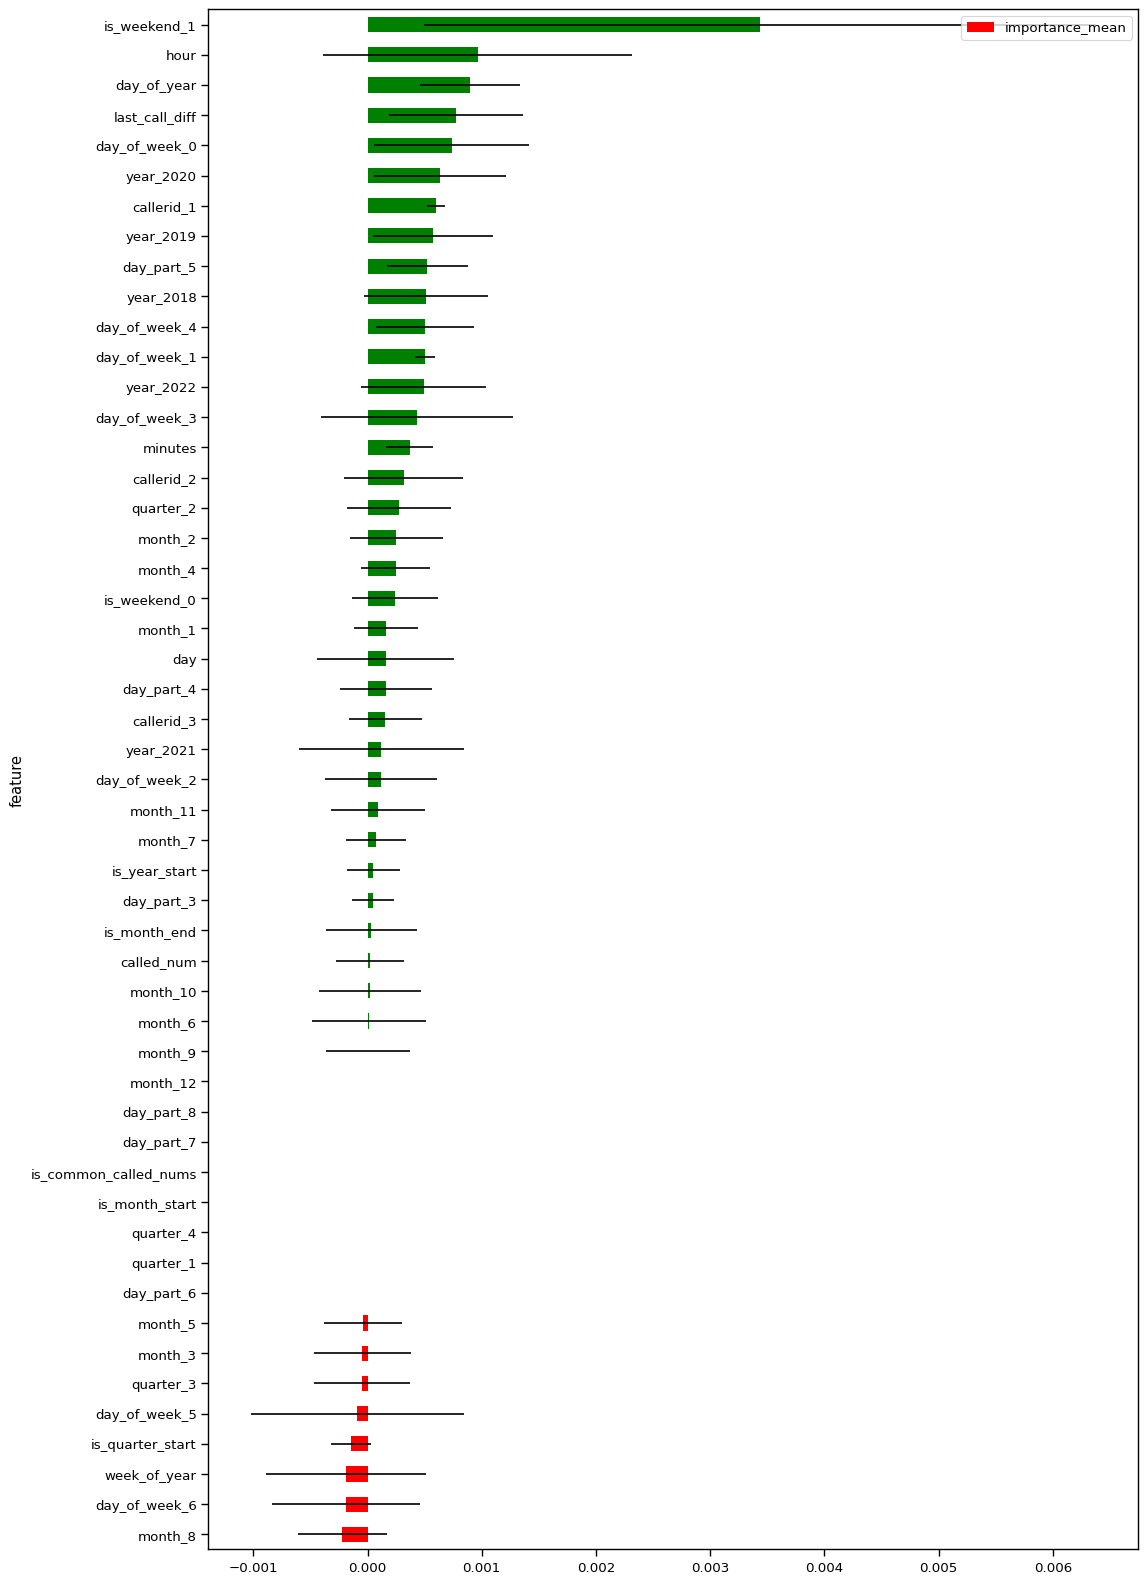

In [128]:
fi = LOFOImportance(dataset, scoring='precision', model=lgbm, cv=cv)

importance_df = fi.get_importance()
plot_importance(importance_df, figsize=(12, 20))

In [129]:
drop_cols = ['year_2022', 'day_part_4', 'month_2', 'year_2021','month_10','quarter_3', 'day', 'quarter_4', 
             'is_weekend_0', 'is_month_start', 'day_part_7', 'is_weekend_1', 'month_12', 'day_part_6', 'day_part_8'
            ]

In [130]:
test_df = data_ts.copy()
test_df[cols] = std.transform(test_df[cols])

test_df.head()

called_num  disposition  last_call_diff       day      hour   minutes  \
1745    0.002424            1       15.652513 -0.053072 -1.119749  0.013420   
3069    0.002424            1       -0.063681 -0.053072 -0.755006  0.074368   
1509    0.002424            1       -0.064459 -0.053072 -0.755006  0.744801   
1684    0.002424            1       -0.061897 -0.053072  0.339224  0.440059   
2933    0.002424            1       -0.062655 -0.053072  1.068711  0.805750   

      day_of_year  week_of_year  is_year_start  is_quarter_start  \
1745     1.264816      1.242915      -0.052986         -0.109046   
3069     1.264816      1.242915      -0.052986         -0.109046   
1509     1.264816      1.242915      -0.052986         -0.109046   
1684     1.264816      1.242915      -0.052986         -0.109046   
2933     1.264816      1.242915      -0.052986         -0.109046   

      is_month_start  is_month_end  callerid_1  callerid_2  callerid_3  \
1745       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
3069       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
1509       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
1684       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   
2933       -0.187926     -0.178982   -4.840773   -0.162605    8.057548   

      year_2018  year_2019  year_2020  year_2021  year_2022   month_1  \
1745  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
3069  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
1509  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
1684  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   
2933  14.093281  -0.078616  -0.774537  -1.031189  -0.330609 -0.307556   

       month_2  month_3   month_4   month_5   month_6   month_7   month_8  \
1745 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
3069 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
1509 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
1684 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   
2933 -0.302973 -0.32627 -0.264419 -0.282671 -0.303838 -0.300906 -0.301664   

       month_9  month_10  month_11  month_12  day_of_week_0  day_of_week_1  \
1745 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
3069 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
1509 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
1684 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   
2933 -0.306039 -0.310066  3.386162  -0.31341      -0.417233      -0.418671   

      day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
1745      -0.426673       2.359336      -0.422895      -0.389262   
3069      -0.426673       2.359336      -0.422895      -0.389262   
1509      -0.426673       2.359336      -0.422895      -0.389262   
1684      -0.426673       2.359336      -0.422895      -0.389262   
2933      -0.426673       2.359336      -0.422895      -0.389262   

      day_of_week_6  quarter_1  quarter_2  quarter_3  quarter_4  day_part_3  \
1745      -0.356908  -0.603078  -0.537046  -0.580547   1.698678    1.813523   
3069      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
1509      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
1684      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   
2933      -0.356908  -0.603078  -0.537046  -0.580547   1.698678   -0.551413   

      day_part_4  day_part_5  day_part_6  day_part_7  day_part_8  \
1745   -0.650175   -0.751343   -0.349057   -0.016481    -0.00306   
3069    1.538048   -0.751343   -0.349057   -0.016481    -0.00306   
1509    1.538048   -0.751343   -0.349057   -0.016481    -0.00306   
1684   -0.650175    1.330950   -0.349057   -0.016481    -0.00306   
2933   -0.650175    1.330950   -0.349057   -0.016481    -0.00306   

      is_week

In [131]:
test_df = test_df.drop(drop_cols, axis=1)
train_df = train_df.drop(drop_cols, axis=1)

In [132]:
X, y = train_df.drop(["disposition"], axis=1), train_df["disposition"]

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40, stratify=y)

#### Modelling

In [140]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold,GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score,fbeta_score

random_state = 123

classifiers = []
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier(logging_level='Silent'))


In [135]:
accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []

for classifier in classifiers :
    print(classifier)
    y_pred = cross_val_predict(classifier, X_train, y_train, cv = cv)
    
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    f1.append(f1_score(y_train, y_pred))
    f2.append(fbeta_score(y_train, y_pred, beta = 2))
    roc_auc.append(roc_auc_score(y_train, y_pred))

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=123),
                   learning_rate=0.1, random_state=123)
RandomForestClassifier(random_state=123)
ExtraTreesClassifier(random_state=123)
GradientBoostingClassifier(random_state=123)
LGBMClassifier(random_state=123)


In [136]:
index = ["AdaBoost", "RandomForest","ExtraTrees","GradientBoosting","LGBMClassifier","CatBoostClassifier"]

df_res = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2, "roc_auc" : roc_auc})
df_res.index = index
df_res

Accuracy  Precision    Recall        f1        f2  \
AdaBoost            0.767732   0.793473  0.789677  0.791571  0.790433   
RandomForest        0.826361   0.797017  0.924580  0.856073  0.895902   
ExtraTrees          0.804262   0.796293  0.872832  0.832807  0.856369   
GradientBoosting    0.839145   0.789827  0.970158  0.870754  0.927792   
LGBMClassifier      0.839545   0.794165  0.962066  0.870090  0.923037   
CatBoostClassifier  0.838496   0.795100  0.957618  0.868825  0.920008   

                     roc_auc  
AdaBoost            0.764822  
RandomForest        0.813340  
ExtraTrees          0.795173  
GradientBoosting    0.821778  
LGBMClassifier      0.823303  
CatBoostClassifier  0.822705

In [137]:
X_test, y_test = test_df.drop(["disposition"], axis=1), test_df["disposition"]

In [138]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X, X_test, y, y_test)
model_dictionary = clf.provide_models(X, X_test, y, y_test)
models

 17%|██████████████▎                                                                    | 5/29 [01:30<08:37, 21.56s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 45%|████████████████████████████████████▊                                             | 13/29 [01:45<00:39,  2.46s/it]

LabelPropagation model failed to execute
Unable to allocate 85.0 GiB for an array with shape (106797, 106797) and data type float64
LabelSpreading model failed to execute
Unable to allocate 85.0 GiB for an array with shape (106797, 106797) and data type float64


 90%|████████████████████████████████████████████████████████████████████████▌        | 26/29 [25:27<11:01, 220.62s/it]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [25:43<00:00, 53.21s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.84               0.84     0.84      0.84   
LGBMClassifier                     0.84               0.84     0.84      0.84   
RandomForestClassifier             0.83               0.83     0.83      0.83   
SVC                                0.83               0.83     0.83      0.82   
BaggingClassifier                  0.82               0.82     0.82      0.82   
ExtraTreesClassifier               0.82               0.82     0.82      0.82   
LogisticRegression                 0.82               0.82     0.82      0.82   
LinearSVC                          0.81               0.81     0.81      0.81   
KNeighborsClassifier               0.81               0.81     0.81      0.81   
LinearDiscriminantAnalysis         0.80               0.80     0.80      0.80   
SGDClassifier                      0.80               0.80     0.80      0.80   
RidgeClassifierCV                  0.80               0.80     0.80      0.80   
RidgeClassifier                    0.80               0.80     0.80      0.80   
AdaBoostClassifier                 0.80               0.80     0.80      0.80   
DecisionTreeClassifier             0.79               0.79     0.79      0.79   
ExtraTreeClassifier                0.78               0.78     0.78      0.78   
NearestCentroid                    0.77               0.77     0.77      0.77   
NuSVC                              0.76               0.76     0.76      0.75   
BernoulliNB                        0.74               0.74     0.74      0.74   
Perceptron                         0.72               0.72     0.72      0.72   
PassiveAggressiveClassifier        0.70               0.70     0.70      0.70   
CalibratedClassifierCV             0.56               0.56     0.56      0.46   
QuadraticDiscriminantAnalysis      0.52               0.52     0.52      0.38   
GaussianNB                         0.51               0.51     0.51      0.37   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
XGBClassifier                       14.66  
LGBMClassifier                       0.96  
RandomForestClassifier              10.59  
SVC                                691.41  
BaggingClassifier                    4.55  
ExtraTreesClassifier                 9.21  
LogisticRegression                   0.75  
LinearSVC                           24.06  
KNeighborsClassifier                 4.04  
LinearDiscriminantAnalysis           0.69  
SGDClassifier                        0.64  
RidgeClassifierCV                    0.50  
RidgeClassifier                      0.26  
AdaBoostClassifier                   4.25  
DecisionTreeClassifier               0.78  
ExtraTreeClassifier                  0.24  
NearestCentroid                      0.18  
NuSVC                              691.95  
BernoulliNB                          0.20  
Perceptron                           0.39  
PassiveAggressiveClassifier          0.31  
CalibratedClassifierCV              81.37  
QuadraticDiscriminantAnalysis        0.35  
GaussianNB                           0.24  
DummyClassifier                      0.14

In [141]:
from sklearn.ensemble import VotingClassifier

clf1 = XGBClassifier()
clf2 = LGBMClassifier(random_state=0, n_jobs=1, verbose=0)
clf3 = CatBoostClassifier()
eclf1 = VotingClassifier(estimators=[('xgb', clf1), ('lgb', clf2), ('cbc', clf3)], voting='soft', verbose=0)

eclf1.fit(X, y)
predictions = eclf1.predict(X_test)
print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Learning rate set to 0.075706
0:	learn: 0.5939414	total: 23.2ms	remaining: 23.2s
1:	learn: 0.5291979	total: 36.9ms	remaining: 18.4s
2:	learn: 0.4852184	total: 52.8ms	remaining: 17.5s
3:	learn: 0.4536561	total: 69.9ms	remaining: 17.4s
4:	learn: 0.4335830	total: 85.9ms	remaining: 17.1s
5:	learn: 0.4194619	total: 99.8ms	remaining: 16.5s
6:	learn: 0.4087712	total: 116ms	remaining: 16.5s
7:	learn: 0.4014344	total: 130ms	remaining: 16.1s
8:	learn: 0.3946824	total: 143ms	remaining: 15.8s
9:	learn: 0.3893979	total: 165ms	remaining: 16.3s
10:	learn: 0.3850986	total: 179ms	remaining: 16.1s
11:	learn: 0.3817927	total: 196ms	remaining: 16.1s
12:	learn: 0.3788163	total: 210ms	remaining: 15.9s
13:	learn: 0.3763811	total: 227ms	remaining: 16s
14:	learn: 0.3742533	total: 242ms

158:	learn: 0.3550264	total: 2.59s	remaining: 13.7s
159:	learn: 0.3549921	total: 2.61s	remaining: 13.7s
160:	learn: 0.3549498	total: 2.62s	remaining: 13.7s
161:	learn: 0.3549092	total: 2.64s	remaining: 13.6s
162:	learn: 0.3548707	total: 2.65s	remaining: 13.6s
163:	learn: 0.3548191	total: 2.67s	remaining: 13.6s
164:	learn: 0.3547856	total: 2.69s	remaining: 13.6s
165:	learn: 0.3547504	total: 2.7s	remaining: 13.6s
166:	learn: 0.3547136	total: 2.72s	remaining: 13.6s
167:	learn: 0.3546855	total: 2.74s	remaining: 13.6s
168:	learn: 0.3546466	total: 2.75s	remaining: 13.5s
169:	learn: 0.3546165	total: 2.77s	remaining: 13.5s
170:	learn: 0.3545648	total: 2.78s	remaining: 13.5s
171:	learn: 0.3545287	total: 2.8s	remaining: 13.5s
172:	learn: 0.3544881	total: 2.83s	remaining: 13.5s
173:	learn: 0.3544645	total: 2.84s	remaining: 13.5s
174:	learn: 0.3544456	total: 2.85s	remaining: 13.5s
175:	learn: 0.3544267	total: 2.87s	remaining: 13.4s
176:	learn: 0.3543856	total: 2.9s	remaining: 13.5s
177:	learn: 0.3

319:	learn: 0.3496888	total: 5.17s	remaining: 11s
320:	learn: 0.3496661	total: 5.2s	remaining: 11s
321:	learn: 0.3496292	total: 5.21s	remaining: 11s
322:	learn: 0.3495869	total: 5.22s	remaining: 10.9s
323:	learn: 0.3495708	total: 5.24s	remaining: 10.9s
324:	learn: 0.3495519	total: 5.26s	remaining: 10.9s
325:	learn: 0.3495181	total: 5.27s	remaining: 10.9s
326:	learn: 0.3494941	total: 5.29s	remaining: 10.9s
327:	learn: 0.3494552	total: 5.3s	remaining: 10.9s
328:	learn: 0.3493775	total: 5.31s	remaining: 10.8s
329:	learn: 0.3493473	total: 5.33s	remaining: 10.8s
330:	learn: 0.3493343	total: 5.35s	remaining: 10.8s
331:	learn: 0.3492888	total: 5.37s	remaining: 10.8s
332:	learn: 0.3492584	total: 5.38s	remaining: 10.8s
333:	learn: 0.3492217	total: 5.4s	remaining: 10.8s
334:	learn: 0.3491893	total: 5.41s	remaining: 10.7s
335:	learn: 0.3491530	total: 5.42s	remaining: 10.7s
336:	learn: 0.3491062	total: 5.44s	remaining: 10.7s
337:	learn: 0.3490877	total: 5.45s	remaining: 10.7s
338:	learn: 0.3490590

484:	learn: 0.3451168	total: 7.79s	remaining: 8.28s
485:	learn: 0.3450985	total: 7.81s	remaining: 8.26s
486:	learn: 0.3450782	total: 7.83s	remaining: 8.25s
487:	learn: 0.3450486	total: 7.84s	remaining: 8.23s
488:	learn: 0.3450220	total: 7.86s	remaining: 8.21s
489:	learn: 0.3449877	total: 7.87s	remaining: 8.19s
490:	learn: 0.3449627	total: 7.89s	remaining: 8.18s
491:	learn: 0.3449335	total: 7.92s	remaining: 8.18s
492:	learn: 0.3449058	total: 7.94s	remaining: 8.16s
493:	learn: 0.3448804	total: 7.96s	remaining: 8.15s
494:	learn: 0.3448569	total: 7.97s	remaining: 8.13s
495:	learn: 0.3448292	total: 7.99s	remaining: 8.12s
496:	learn: 0.3448053	total: 8s	remaining: 8.1s
497:	learn: 0.3447790	total: 8.02s	remaining: 8.08s
498:	learn: 0.3447612	total: 8.03s	remaining: 8.06s
499:	learn: 0.3447420	total: 8.04s	remaining: 8.04s
500:	learn: 0.3447259	total: 8.06s	remaining: 8.03s
501:	learn: 0.3447121	total: 8.08s	remaining: 8.01s
502:	learn: 0.3446913	total: 8.1s	remaining: 8s
503:	learn: 0.344669

655:	learn: 0.3408779	total: 10.6s	remaining: 5.56s
656:	learn: 0.3408611	total: 10.6s	remaining: 5.54s
657:	learn: 0.3408426	total: 10.6s	remaining: 5.52s
658:	learn: 0.3408269	total: 10.6s	remaining: 5.51s
659:	learn: 0.3407946	total: 10.7s	remaining: 5.49s
660:	learn: 0.3407652	total: 10.7s	remaining: 5.47s
661:	learn: 0.3407446	total: 10.7s	remaining: 5.46s
662:	learn: 0.3407242	total: 10.7s	remaining: 5.44s
663:	learn: 0.3406905	total: 10.7s	remaining: 5.43s
664:	learn: 0.3406737	total: 10.7s	remaining: 5.41s
665:	learn: 0.3406420	total: 10.8s	remaining: 5.39s
666:	learn: 0.3406148	total: 10.8s	remaining: 5.38s
667:	learn: 0.3405877	total: 10.8s	remaining: 5.36s
668:	learn: 0.3405595	total: 10.8s	remaining: 5.34s
669:	learn: 0.3405487	total: 10.8s	remaining: 5.33s
670:	learn: 0.3405229	total: 10.8s	remaining: 5.31s
671:	learn: 0.3404915	total: 10.8s	remaining: 5.29s
672:	learn: 0.3404740	total: 10.9s	remaining: 5.28s
673:	learn: 0.3404576	total: 10.9s	remaining: 5.27s
674:	learn: 

825:	learn: 0.3368851	total: 13.4s	remaining: 2.83s
826:	learn: 0.3368563	total: 13.4s	remaining: 2.81s
827:	learn: 0.3368238	total: 13.4s	remaining: 2.79s
828:	learn: 0.3368094	total: 13.5s	remaining: 2.78s
829:	learn: 0.3367885	total: 13.5s	remaining: 2.76s
830:	learn: 0.3367634	total: 13.5s	remaining: 2.74s
831:	learn: 0.3367344	total: 13.5s	remaining: 2.73s
832:	learn: 0.3367175	total: 13.5s	remaining: 2.71s
833:	learn: 0.3366931	total: 13.5s	remaining: 2.69s
834:	learn: 0.3366749	total: 13.6s	remaining: 2.68s
835:	learn: 0.3366546	total: 13.6s	remaining: 2.66s
836:	learn: 0.3366188	total: 13.6s	remaining: 2.65s
837:	learn: 0.3365976	total: 13.6s	remaining: 2.63s
838:	learn: 0.3365857	total: 13.6s	remaining: 2.61s
839:	learn: 0.3365658	total: 13.6s	remaining: 2.6s
840:	learn: 0.3365384	total: 13.7s	remaining: 2.58s
841:	learn: 0.3365091	total: 13.7s	remaining: 2.56s
842:	learn: 0.3364884	total: 13.7s	remaining: 2.55s
843:	learn: 0.3364696	total: 13.7s	remaining: 2.53s
844:	learn: 0

989:	learn: 0.3333290	total: 16.1s	remaining: 162ms
990:	learn: 0.3333097	total: 16.1s	remaining: 146ms
991:	learn: 0.3332936	total: 16.1s	remaining: 130ms
992:	learn: 0.3332712	total: 16.1s	remaining: 114ms
993:	learn: 0.3332585	total: 16.1s	remaining: 97.4ms
994:	learn: 0.3332353	total: 16.2s	remaining: 81.2ms
995:	learn: 0.3332116	total: 16.2s	remaining: 65ms
996:	learn: 0.3331912	total: 16.2s	remaining: 48.7ms
997:	learn: 0.3331611	total: 16.2s	remaining: 32.5ms
998:	learn: 0.3331362	total: 16.2s	remaining: 16.2ms
999:	learn: 0.3331202	total: 16.2s	remaining: 0us
Accuracy Score 
0.8431715857928964
Precision 
0.7775080906148867
CM 


array([[1449,  550],
       [  77, 1922]], dtype=int64)

In [142]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=124)

mlp.fit(X,y)

predictions = mlp.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.8271635817908954
Precision 
0.7556684910086005
CM 


array([[1374,  625],
       [  66, 1933]], dtype=int64)

In [144]:
from xgboost import XGBClassifier

xgc = XGBClassifier()

xgc.fit(X,y)

predictions = xgc.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.840920460230115
Precision 
0.7824285122254455
CM 


array([[1474,  525],
       [ 111, 1888]], dtype=int64)

In [145]:

lgb = LGBMClassifier()

lgb.fit(X,y)

predictions = lgb.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.8389194597298649
Precision 
0.7704590818363274
CM 


array([[1424,  575],
       [  69, 1930]], dtype=int64)

In [146]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True) 
svm.fit(X,y)

# Make predictions (classes and probabilities) with the trained model on the test set.
predictions = svm.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.8271635817908954
Precision 
0.7582938388625592
CM 


array([[1387,  612],
       [  79, 1920]], dtype=int64)

In [147]:
X_ori = X.copy() 
X_test_ori = X_test.copy() 

#### Dimetional Reduction

In [148]:
from sklearn.decomposition import PCA

def apply_pca(data):
    
    pca = PCA(n_components=0.95)
    principalComponents = pca.fit_transform(data)
    pc_columns = []
    for i in range(1, pca.n_components_ + 1, 1):
        pc_columns.append('PC' + str(i))

    pca_data = pd.DataFrame(data=principalComponents, columns=pc_columns, index=data.index)

    return pca, pca_data, pc_columns

In [149]:
pca, X_tr_pca, pc_columns = apply_pca(X)
X_tr_pca.shape

(106797, 25)

In [151]:
X_ts_pca = pca.transform(X_test)
X_ts_pca = pd.DataFrame(data=X_ts_pca, columns=pc_columns, index=X_test.index)

In [152]:
X = X_tr_pca.copy()
X_test = X_ts_pca.copy()

In [154]:

lgb = LGBMClassifier()

lgb.fit(X,y)

predictions = lgb.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.8404202101050525
Precision 
0.774727492935002
CM 


array([[1441,  558],
       [  80, 1919]], dtype=int64)

In [153]:
from xgboost import XGBClassifier

xgc = XGBClassifier()

xgc.fit(X, y)

predictions = xgc.predict(X_test)

print("Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Precision ")
print(precision_score(y_test, predictions))

print("CM ")
confusion_matrix(y_test, predictions)

Accuracy Score 
0.8419209604802401
Precision 
0.7846730528946272
CM 


array([[1482,  517],
       [ 115, 1884]], dtype=int64)

* Görüldüğü üzere elde edilen en iyi sonuç 0.84 civarında XGB ile elde edilmiştir. LGB and SVM ile de yakın sonuçlar elde edilmiştir. 

#### Model Improvement

* RFECV yöntemi ile özellik seçimi için daha detaylı inceleme bakılmak istenmiştir- LGB ve XGB için özellikle-
* Bu aşamada LGB ve XGB için hyper parametre optimizasyonunda bulunmak amaçlanmıştır. (GridSearchCV, RandomSearchCV yöntemleri ile)
* Aynı şekilde LDA için parametre optimizasyonunda bulunduktan sonra verileri tekrardan eğitime verilmek amaçlanmıştır.
* Derin ağlarla -keras, pytorch kütüphaneleri kullanılarak- eğitim amaçlanmıştır. (MLP ve LSTM gibi). LSTM tarzı networkleri burda kullanmak bu gibi problemler için uygulamak ne kadar anlamlı görünmese de buna benzer uygulamalarda kaggle yarışmalarında yüksek skorlar alan uygulamar mevcuttur. Bakınız: https://www.kaggle.com/competitions/customer-churn-prediction-2020/code

